# Import the necessary libraries

In [1]:
!pip install pmdarima
!pip install sktime==0.28.0
!pip install tensorflow==2.15.1
!pip install --upgrade sktime dask
!pip install keras-tuner
#!pip install --upgrade dask
!pip install dask==2023.5.0

  Using cached tensorflow-2.15.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ml_dtypes-0.3.2-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
  Using cached wrapt-1.14.2-cp311-cp311-manylinux1_x86_64.manylinux_2_28_x86_64.manylinux_2_5_x86_64.whl.metadata (6.5 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.3/475.3 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

  Using cached sktime-0.38.4-py3-none-any.whl.metadata (35 kB)
Using cached sktime-0.38.4-py3-none-any.whl (35.5 MB)
  Attempting uninstall: sktime
    Found existing installation: sktime 0.28.0
    Uninstalling sktime-0.28.0:
      Successfully uninstalled sktime-0.28.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.4 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2025.7.0
    Uninstalling dask-2025.7.0:
      Successfully uninstalled dask-2025.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rapids-dask-dependency 25.6.0 requires dask==2025.5.0, but you have dask 2023.5.0 which is incompatible.
distributed 2025.5.0 requires dask==2025.5.0, but you have dask 2023.5.0 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have scikit-learn 1.4.2 which is incompatible.


In [77]:
!pip install --upgrade sktime dask

  Using cached sktime-0.38.4-py3-none-any.whl.metadata (35 kB)
  Using cached dask-2025.7.0-py3-none-any.whl.metadata (3.8 kB)
Using cached sktime-0.38.4-py3-none-any.whl (35.5 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 57.3 MB/s eta 0:00:00
  Attempting uninstall: dask
    Found existing installation: dask 2025.5.0
    Uninstalling dask-2025.5.0:
      Successfully uninstalled dask-2025.5.0
  Attempting uninstall: sktime
    Found existing installation: sktime 0.28.0
    Uninstalling sktime-0.28.0:
      Successfully uninstalled sktime-0.28.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
rapids-dask-dependency 25.6.0 requires dask==2025.5.0, but you have dask 2025.7.0 which is incompatible.
distributed 2025.5.0 requires dask==2025.5.0, but you have dask 2025.7.0 which is incompatible.
cuml-cu12 25.6.0 requires scikit-learn>=1.5, but you have 

In [2]:
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 11.0 MB/s eta 0:00:00


In [2]:
import gdown
import re
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima import auto_arima

# Load the relevant helper functions from sktime.
from sktime.forecasting.compose import (TransformedTargetForecaster, make_reduction)
from sktime.forecasting.model_selection import (ExpandingWindowSplitter, ForecastingGridSearchCV)
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Deseasonalizer, Detrender

from xgboost import XGBRegressor
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

import statsmodels.api as sm
import matplotlib.pyplot as plt
from pylab import rcParams
import warnings
import pandas as pd # Added pandas import

from keras_tuner.tuners import RandomSearch
from keras_tuner import HyperParameters
#from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
#from keras_tuner import RandomSearch
import shutil
import os

import warnings

#import pmdarima as pm

warnings.filterwarnings('ignore')
pd.set_option('display.width', None)

In [ ]:
# Load the dataset
Data source was removed due to signed NDA

In [4]:
# View the UKWeekly dataset
UKweekly_df

{'F Adult Fiction':                 ISBN                Title            Author  Interval  \
 0      9780002261821      One For My Baby     Parsons, Tony    200513   
 1      9780002261821      One For My Baby     Parsons, Tony    200503   
 2      9780002261821      One For My Baby     Parsons, Tony    200422   
 3      9780002261821      One For My Baby     Parsons, Tony    200415   
 4      9780002261821      One For My Baby     Parsons, Tony    200404   
 ...              ...                  ...               ...       ...   
 73762  9781860498800  Blind Assassin, The  Atwood, Margaret    200134   
 73763  9781860498800  Blind Assassin, The  Atwood, Margaret    200133   
 73764  9781860498800  Blind Assassin, The  Atwood, Margaret    200132   
 73765  9781860498800  Blind Assassin, The  Atwood, Margaret    200131   
 73766  9781860498800  Blind Assassin, The  Atwood, Margaret    200120   
 
         End Date  Volume    Value     ASP    RRP    Binding  \
 0     2005-04-02       1  

In [5]:
# Combine all dictionaries in UKWeekly_df into a single dataframe
UKweekly_combined = pd.concat(
    [df.assign(Category=key) for key, df in UKweekly_df.items()],
    ignore_index=True
)

In [6]:
print(UKweekly_combined.shape)
UKweekly_combined.head()

(227224, 14)


ISBN            Title         Author  Interval   End Date  Volume  \
0  9780002261821  One For My Baby  Parsons, Tony    200513 2005-04-02       1   
1  9780002261821  One For My Baby  Parsons, Tony    200503 2005-01-22       1   
2  9780002261821  One For My Baby  Parsons, Tony    200422 2004-05-29       1   
3  9780002261821  One For My Baby  Parsons, Tony    200415 2004-04-10       2   
4  9780002261821  One For My Baby  Parsons, Tony    200404 2004-01-24       2   

   Value    ASP    RRP   Binding                   Imprint    Publisher Group  \
0  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
1  15.99  15.99  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
2  11.19  11.19  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
3  27.18  13.59  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   
4  22.48  11.24  15.99  Hardback  HarperCollins Publishers  HarperCollins Grp   

                     Product Class         Category  
0  F1.1 General & Literary Fiction  F Adult Fiction  
1  F1.1 General & Literary Fiction  F Adult Fiction  
2  F1.1 General & Literary Fiction  F Adult Fiction  
3  F1.1 General & Literary Fiction  F Adult Fiction  
4  F1.1 General & Literary Fiction  F Adult Fiction

In [7]:
UKweekly_combined.tail()

ISBN                        Title Author  Interval  \
227219  9781903840122  Wicked Book of Txt Tlk, The    NaN    200112   
227220  9781903840122  Wicked Book of Txt Tlk, The    NaN    200111   
227221  9781903840122  Wicked Book of Txt Tlk, The    NaN    200110   
227222  9781903840122  Wicked Book of Txt Tlk, The    NaN    200109   
227223  9781903840122  Wicked Book of Txt Tlk, The    NaN    200108   

         End Date  Volume    Value     ASP   RRP    Binding       Imprint  \
227219 2001-03-24     693  1377.31  1.9875  1.99  Paperback  Buster Books   
227220 2001-03-17     638  1269.23  1.9894  1.99  Paperback  Buster Books   
227221 2001-03-10     850  1691.50  1.9900  1.99  Paperback  Buster Books   
227222 2001-03-03     517  1027.25  1.9869  1.99  Paperback  Buster Books   
227223 2001-02-24      69   137.31  1.9900  1.99  Paperback  Buster Books   

           Publisher Group                               Product Class  \
227219  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227220  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227221  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227222  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
227223  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   

                              Category  
227219  Y Children's, YA & Educational  
227220  Y Children's, YA & Educational  
227221  Y Children's, YA & Educational  
227222  Y Children's, YA & Educational  
227223  Y Children's, YA & Educational

In [8]:
# View the UKWeekly dataset
ISBNList_df

{'F - Adult Fiction':               ISBN                                              Title  \
 0    9780330375252                Bridget Jones's Diary (Film Tie-in)   
 1    9780140276336                                        White Teeth   
 2    9780006512134                                        Man and Boy   
 3    9780099280255                                       Brethren,The   
 4    9780552998727  Marrying The Mistress:an irresistible and grip...   
 ..             ...                                                ...   
 120  9780333761403                                               Once   
 121  9780099394310                                     Charlotte Gray   
 122  9780007123834  Lord of the Rings,The:(v. 2) :The Lord of the ...   
 123  9780099727415                             Stars Tennis Balls,The   
 124  9780752837086                    Set in Darkness:Inspector Rebus   
 
                 Author                   Imprint    Publisher Group    RRP  \
 0      Fi

In [9]:
# Combine all dictionaries in ISBNList_df into a single dataframe
ISBNList_combined = pd.concat(
    [df.assign(Category=key) for key, df in ISBNList_df.items()],
    ignore_index=True
)

In [10]:
print(ISBNList_combined.shape)
ISBNList_combined.head()

(500, 11)


ISBN                                              Title  \
0  9780330375252                Bridget Jones's Diary (Film Tie-in)   
1  9780140276336                                        White Teeth   
2  9780006512134                                        Man and Boy   
3  9780099280255                                       Brethren,The   
4  9780552998727  Marrying The Mistress:an irresistible and grip...   

             Author                   Imprint    Publisher Group    RRP  \
0   Fielding, Helen                   Picador  Pan Macmillan Grp   8.99   
1      Smith, Zadie         Penguin Books Ltd        Penguin Grp   9.99   
2     Parsons, Tony  HarperCollins Publishers  HarperCollins Grp   8.99   
3     Grisham, John               Arrow Books   Random House Grp   6.99   
4  Trollope, Joanna                Black Swan     Transworld Grp  10.99   

     Binding Publication Date                     Product Class  \
0  Paperback       2001-03-23   F1.1 General & Literary Fiction   
1  Paperback       2001-01-25   F1.1 General & Literary Fiction   
2  Paperback       2000-03-06   F1.1 General & Literary Fiction   
3  Paperback       2000-12-27  F2.1 Crime, Thriller & Adventure   
4  Paperback       2001-02-01   F1.1 General & Literary Fiction   

  Country of Publication           Category  
0         United Kingdom  F - Adult Fiction  
1         United Kingdom  F - Adult Fiction  
2         United Kingdom  F - Adult Fiction  
3         United Kingdom  F - Adult Fiction  
4         United Kingdom  F - Adult Fiction

In [11]:
ISBNList_combined.tail()

ISBN                                              Title  \
495  9781854306838                Laura's Christmas Star:Laura's Star   
496  9780723245995                                       Where's Spot   
497  9781902836553                             Action Man Annual:2002   
498  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
499  9780754702153                 Pokemon Collector's File:Funfax S.   

              Author                                    Imprint  \
495  Baumgart, Klaus                         Little Tiger Press   
496       Hill, Eric                     F Warne Publishers Ltd   
497              NaN                             Pedigree Books   
498        CGP Books  Coordination Group Publications Ltd (CGP)   
499              NaN          Dorling Kindersley Publishers Ltd   

                     Publisher Group   RRP    Binding Publication Date  \
495         Little Tiger Press Group  5.99  Paperback       2001-09-28   
496                      Penguin Grp  4.99   Hardback       2000-03-13   
497                     Pedigree Grp  6.99   Hardback       2001-09-08   
498  Coordination Group Publications  6.50   Hardback       2023-05-23   
499           Dorling Kindersley Grp  5.99   Hardback       2000-04-09   

                                         Product Class Country of Publication  \
495                                 Y1.3 Picture Books         United Kingdom   
496                   Y1.1 Pre-school & Early Learning         United Kingdom   
497         Y4.1 Children's General Interest & Leisure         United Kingdom   
498  Y5.3 School Textbooks & Study Guides: Maths, S...         United Kingdom   
499                      Y1.2 Novelty & Activity Books         United Kingdom   

                           Category  
495  Y Children's, YA & Educational  
496  Y Children's, YA & Educational  
497  Y Children's, YA & Educational  
498  Y Children's, YA & Educational  
499  Y Children's, YA & Educational

### **Conducting initial data investigation**

##### **Explore Datasets**

In [12]:
UKweekly_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227224 entries, 0 to 227223
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ISBN             227224 non-null  int64         
 1   Title            227224 non-null  object        
 2   Author           212345 non-null  object        
 3   Interval         227224 non-null  int64         
 4   End Date         227224 non-null  datetime64[ns]
 5   Volume           227224 non-null  int64         
 6   Value            227224 non-null  float64       
 7   ASP              226881 non-null  float64       
 8   RRP              221262 non-null  float64       
 9   Binding          227224 non-null  object        
 10  Imprint          227224 non-null  object        
 11  Publisher Group  227224 non-null  object        
 12  Product Class    227224 non-null  object        
 13  Category         227224 non-null  object        
dtypes: datetime64[ns](1)

UK Weekly dataset shows, 1 datetime column, 3 float64 columns, 3 integer columns and 6 columns with objects. Author, RRP and ASP columns have some missing rows in them.

In [13]:
ISBNList_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   ISBN                    500 non-null    int64         
 1   Title                   500 non-null    object        
 2   Author                  426 non-null    object        
 3   Imprint                 500 non-null    object        
 4   Publisher Group         500 non-null    object        
 5   RRP                     473 non-null    float64       
 6   Binding                 500 non-null    object        
 7   Publication Date        500 non-null    datetime64[ns]
 8   Product Class           500 non-null    object        
 9   Country of Publication  500 non-null    object        
 10  Category                500 non-null    object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(8)
memory usage: 43.1+ KB


The combined ISBN List Dataframe shows, 1 datetime column, 1 float64 column, 1 integer columns and 8 object column. Author column had 74 missing values while RRP had 27 missing values.

In [14]:
# Replace spaces with underscores across all column names
UKweekly_combined.columns = UKweekly_combined.columns.str.replace(' ', '_')
ISBNList_combined.columns = ISBNList_combined.columns.str.replace(' ', '_')


In [15]:
# Convert ISBN in both DataFrames to string
UKweekly_combined['ISBN'] = UKweekly_combined['ISBN'].astype(str)
ISBNList_combined['ISBN'] = ISBNList_combined['ISBN'].astype(str)

In [16]:
# Ensure End Date is datetime
UKweekly_combined['End_Date'] = pd.to_datetime(UKweekly_combined['End_Date'])

In [17]:
# Set 'End_Date' as the index
UKweekly_combined.set_index('End_Date', inplace=True)

In [18]:
print(UKweekly_combined.shape)
UKweekly_combined.head()

(227224, 13)


ISBN            Title         Author  Interval  Volume  \
End_Date                                                                      
2005-04-02  9780002261821  One For My Baby  Parsons, Tony    200513       1   
2005-01-22  9780002261821  One For My Baby  Parsons, Tony    200503       1   
2004-05-29  9780002261821  One For My Baby  Parsons, Tony    200422       1   
2004-04-10  9780002261821  One For My Baby  Parsons, Tony    200415       2   
2004-01-24  9780002261821  One For My Baby  Parsons, Tony    200404       2   

            Value    ASP    RRP   Binding                   Imprint  \
End_Date                                                              
2005-04-02  15.99  15.99  15.99  Hardback  HarperCollins Publishers   
2005-01-22  15.99  15.99  15.99  Hardback  HarperCollins Publishers   
2004-05-29  11.19  11.19  15.99  Hardback  HarperCollins Publishers   
2004-04-10  27.18  13.59  15.99  Hardback  HarperCollins Publishers   
2004-01-24  22.48  11.24  15.99  Hardback  HarperCollins Publishers   

              Publisher_Group                    Product_Class  \
End_Date                                                         
2005-04-02  HarperCollins Grp  F1.1 General & Literary Fiction   
2005-01-22  HarperCollins Grp  F1.1 General & Literary Fiction   
2004-05-29  HarperCollins Grp  F1.1 General & Literary Fiction   
2004-04-10  HarperCollins Grp  F1.1 General & Literary Fiction   
2004-01-24  HarperCollins Grp  F1.1 General & Literary Fiction   

                   Category  
End_Date                     
2005-04-02  F Adult Fiction  
2005-01-22  F Adult Fiction  
2004-05-29  F Adult Fiction  
2004-04-10  F Adult Fiction  
2004-01-24  F Adult Fiction

In [19]:
UKweekly_combined.tail()

ISBN                        Title Author  Interval  \
End_Date                                                                  
2001-03-24  9781903840122  Wicked Book of Txt Tlk, The    NaN    200112   
2001-03-17  9781903840122  Wicked Book of Txt Tlk, The    NaN    200111   
2001-03-10  9781903840122  Wicked Book of Txt Tlk, The    NaN    200110   
2001-03-03  9781903840122  Wicked Book of Txt Tlk, The    NaN    200109   
2001-02-24  9781903840122  Wicked Book of Txt Tlk, The    NaN    200108   

            Volume    Value     ASP   RRP    Binding       Imprint  \
End_Date                                                             
2001-03-24     693  1377.31  1.9875  1.99  Paperback  Buster Books   
2001-03-17     638  1269.23  1.9894  1.99  Paperback  Buster Books   
2001-03-10     850  1691.50  1.9900  1.99  Paperback  Buster Books   
2001-03-03     517  1027.25  1.9869  1.99  Paperback  Buster Books   
2001-02-24      69   137.31  1.9900  1.99  Paperback  Buster Books   

               Publisher_Group                               Product_Class  \
End_Date                                                                     
2001-03-24  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
2001-03-17  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
2001-03-10  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
2001-03-03  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   
2001-02-24  Michael O'Mara Grp  Y4.1 Children's General Interest & Leisure   

                                  Category  
End_Date                                    
2001-03-24  Y Children's, YA & Educational  
2001-03-17  Y Children's, YA & Educational  
2001-03-10  Y Children's, YA & Educational  
2001-03-03  Y Children's, YA & Educational  
2001-02-24  Y Children's, YA & Educational

In [20]:
#UKweekly_combined.resample('W').sum().fillna(0, inplace=True)

In [21]:
# Aggregate UKweekly_combined DataFrame by week
UKweekly_combined_2 = UKweekly_combined.resample('W').sum()

In [22]:
# Convert volume column in UKweekly_combine_2 to float
UKweekly_combined_2['Volume'] = UKweekly_combined_2['Volume'].astype(float)

**Filter out the ISBNs wherein sales data exists beyond 2024-07-01.**

In [23]:
# Filter UKweekly_combined for records with sales data beyond 2024-07-01
UKweekly_combined_filtered = UKweekly_combined[UKweekly_combined.index > '2024-07-01']

In [24]:
print(UKweekly_combined_filtered.shape)
UKweekly_combined_filtered.head()

(155, 13)


ISBN              Title         Author  Interval  Volume  \
End_Date                                                                        
2024-07-13  9780006512134        Man and Boy  Parsons, Tony    202428       6   
2024-07-06  9780006512134        Man and Boy  Parsons, Tony    202427       1   
2024-07-20  9780006514091  Glass Palace, The  Ghosh, Amitav    202429      11   
2024-07-13  9780006514091  Glass Palace, The  Ghosh, Amitav    202428      11   
2024-07-06  9780006514091  Glass Palace, The  Ghosh, Amitav    202427       8   

             Value     ASP   RRP    Binding                   Imprint  \
End_Date                                                                
2024-07-13   51.78  8.6300  8.99  Paperback  HarperCollins Publishers   
2024-07-06    8.27  8.2700  8.99  Paperback  HarperCollins Publishers   
2024-07-20  107.49  9.7718  9.99  Paperback  HarperCollins Publishers   
2024-07-13  108.29  9.8445  9.99  Paperback  HarperCollins Publishers   
2024-07-06   77.52  9.6900  9.99  Paperback  HarperCollins Publishers   

              Publisher_Group                    Product_Class  \
End_Date                                                         
2024-07-13  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-06  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-20  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-13  HarperCollins Grp  F1.1 General & Literary Fiction   
2024-07-06  HarperCollins Grp  F1.1 General & Literary Fiction   

                   Category  
End_Date                     
2024-07-13  F Adult Fiction  
2024-07-06  F Adult Fiction  
2024-07-20  F Adult Fiction  
2024-07-13  F Adult Fiction  
2024-07-06  F Adult Fiction

In [25]:
UKweekly_combined_filtered.tail()

ISBN                                              Title  \
End_Date                                                                       
2024-07-13  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
2024-07-06  9781841462400  KS3 Science Revision Guide – Foundation (inclu...   
2024-07-20  9781841462509                             KS2 Science Study Book   
2024-07-13  9781841462509                             KS2 Science Study Book   
2024-07-06  9781841462509                             KS2 Science Study Book   

               Author  Interval  Volume    Value     ASP  RRP    Binding  \
End_Date                                                                   
2024-07-13  CGP Books    202428      36   230.82  6.4117  6.5   Hardback   
2024-07-06  CGP Books    202427      44   288.94  6.5668  6.5   Hardback   
2024-07-20  CGP Books    202429     167  1092.37  6.5411  6.5  Paperback   
2024-07-13  CGP Books    202428     132   848.64  6.4291  6.5  Paperback   
2024-07-06  CGP Books    202427     123   801.72  6.5180  6.5  Paperback   

                                              Imprint  \
End_Date                                                
2024-07-13  Coordination Group Publications Ltd (CGP)   
2024-07-06  Coordination Group Publications Ltd (CGP)   
2024-07-20  Coordination Group Publications Ltd (CGP)   
2024-07-13  Coordination Group Publications Ltd (CGP)   
2024-07-06  Coordination Group Publications Ltd (CGP)   

                            Publisher_Group  \
End_Date                                      
2024-07-13  Coordination Group Publications   
2024-07-06  Coordination Group Publications   
2024-07-20  Coordination Group Publications   
2024-07-13  Coordination Group Publications   
2024-07-06  Coordination Group Publications   

                                                Product_Class  \
End_Date                                                        
2024-07-13  Y5.3 School Textbooks & Study Guides: Maths, S...   
2024-07-06  Y5.3 School Textbooks & Study Guides: Maths, S...   
2024-07-20  Y5.3 School Textbooks & Study Guides: Maths, S...   
2024-07-13  Y5.3 School Textbooks & Study Guides: Maths, S...   
2024-07-06  Y5.3 School Textbooks & Study Guides: Maths, S...   

                                  Category  
End_Date                                    
2024-07-13  Y Children's, YA & Educational  
2024-07-06  Y Children's, YA & Educational  
2024-07-20  Y Children's, YA & Educational  
2024-07-13  Y Children's, YA & Educational  
2024-07-06  Y Children's, YA & Educational

In [26]:
# Get the list of ISBNs that meet the condition
isbn_filtered = UKweekly_combined_filtered['ISBN'].unique()

In [27]:
len(isbn_filtered )

61

61 distinct book titles were sold after July 1, 2024 in the dataset.

In [28]:
# Show the filtered ISBNs
print(isbn_filtered)

['9780006512134' '9780006514091' '9780006514213' '9780006550433'
 '9780007101887' '9780099244721' '9780099771517' '9780140276336'
 '9780140285215' '9780140295962' '9780261103252' '9780349112763'
 '9780349113609' '9780349114033' '9780552145053' '9780552145060'
 '9780552997348' '9780552998000' '9780552998444' '9780552998482'
 '9780552998727' '9780722532935' '9780747268161' '9780749397548'
 '9780099286387' '9780006531203' '9780091816971' '9780091867775'
 '9780099285823' '9780099286578' '9780099422587' '9780099428558'
 '9780140259506' '9780140275421' '9780140276619' '9780140281293'
 '9780140294231' '9780224060875' '9780330355667' '9780340696767'
 '9780340766057' '9780340786055' '9780552145954' '9780552997034'
 '9780593048153' '9780719559792' '9780749395698' '9781841150437'
 '9780006647553' '9780241003008' '9780440864141' '9780440864554'
 '9780744523232' '9780752844299' '9780752846576' '9781841460307'
 '9781841460406' '9781841461502' '9781841462301' '9781841462400'
 '9781841462509']


##### **Plot the data of all the ISBNs from the previous step**.

In [29]:
# Create a plot grid (e.g., 8x8 grid for 64 slots, leaving some empty space for 61 ISBNs)
num_plots = len(isbn_filtered)
rows = (num_plots // 6) + (1 if num_plots % 6 != 0 else 0)  # Calculate number of rows needed
cols = 6  # 8 plots per row

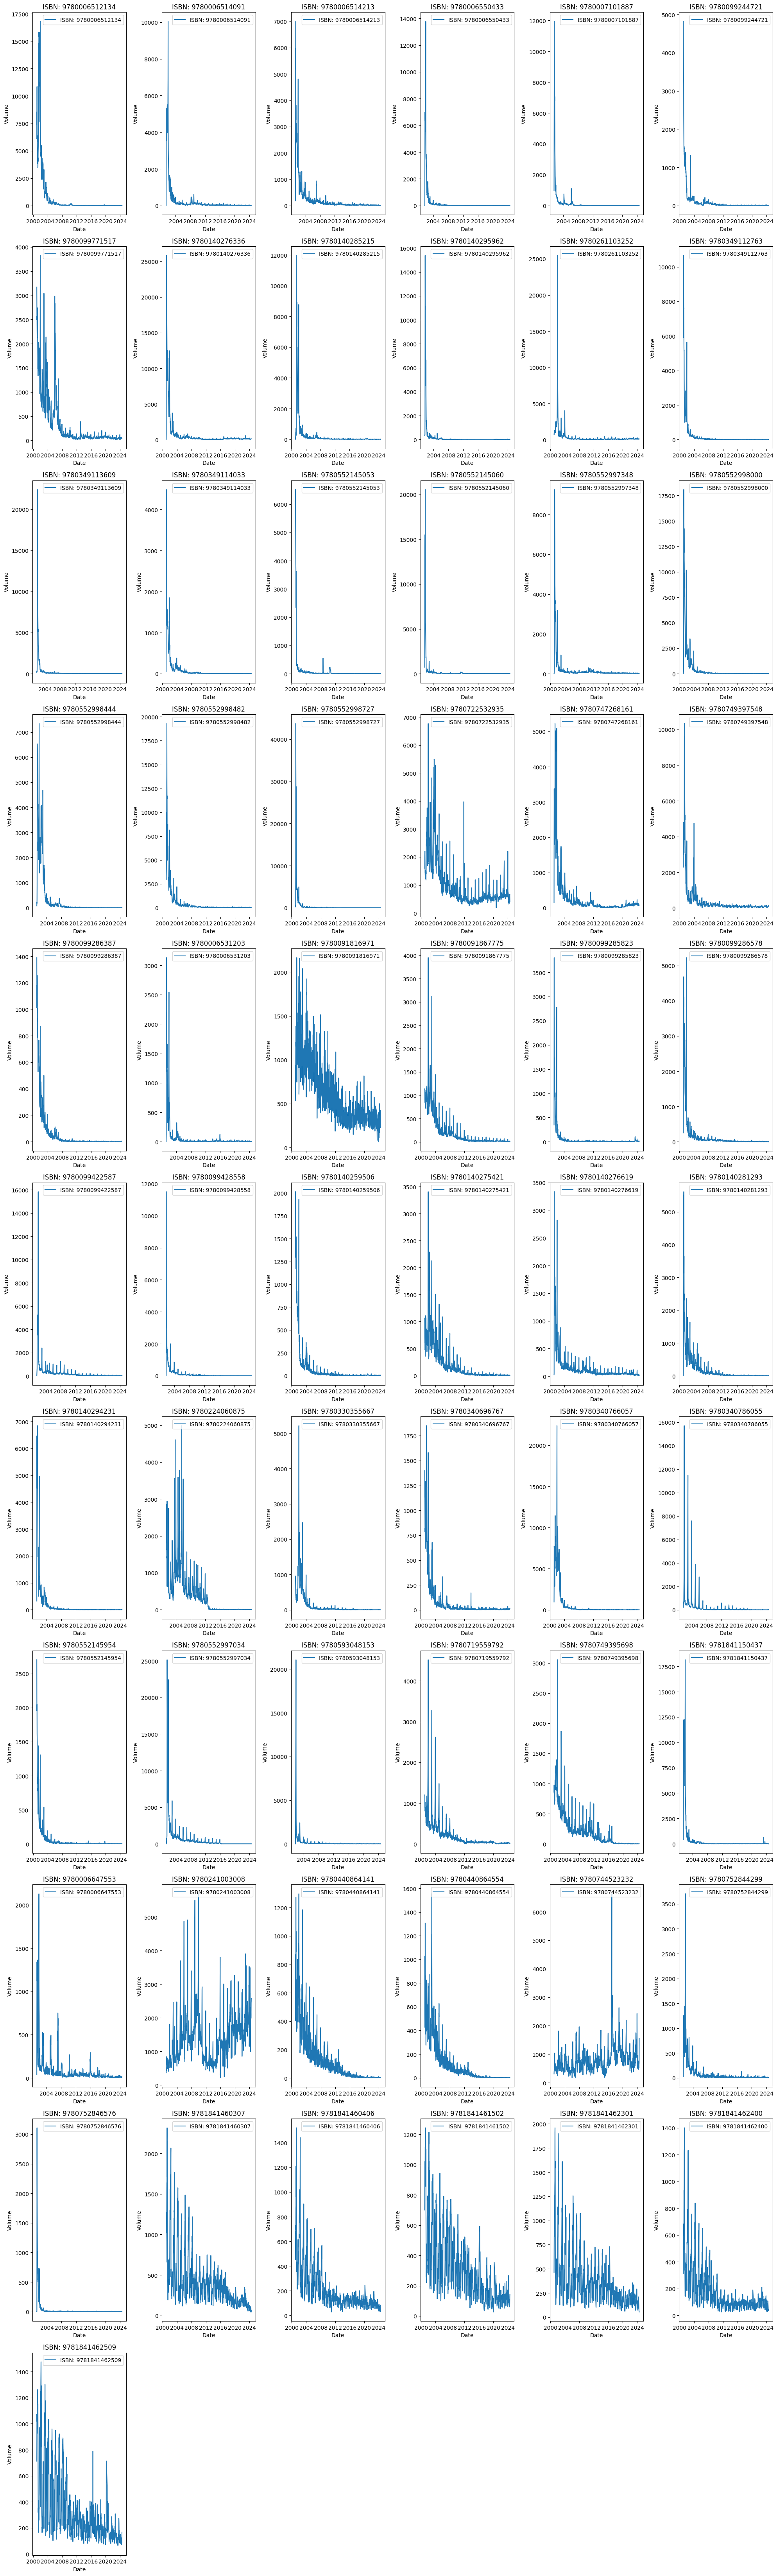

In [30]:
# Create the figure and axes for subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, 6 * rows))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each ISBN and plot the data from the original UKweekly_combined dataframe
for idx, isbn in enumerate(isbn_filtered):
    # Filter the original UKweekly_combined to get data for the current ISBN
    UKweekly_combined_isbn = UKweekly_combined[UKweekly_combined['ISBN'] == isbn]

    # Plot the data
    axes[idx].plot(UKweekly_combined_isbn.index, UKweekly_combined_isbn['Volume'], label=f'ISBN: {isbn}')
    axes[idx].set_title(f'ISBN: {isbn}')
    axes[idx].set_xlabel('Date')
    axes[idx].set_ylabel('Volume')
    axes[idx].legend()

# Remove unused subplots if there are any
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

# Adjust layout for better spacing
plt.tight_layout()

The genral trend from the sales volumn plots of books identified to be sold after 1st of july 2024, shows a drastic declining trend within the first 12 years period followed by a much slower, nearly flat decline from 2012 onward. Flood (2013) suggests that this long-term drop in print sales is linked to the rise in e-book popularity.

The exception to this how ever is 9780241003008 (The Very Hungy Caterpiller) and 9780744523232 (We're Going on a Bear Hunt), which are children and educational books used to establish early reading skills in kids.


Flood, A. (2013) Printed book sales’ decline slowed in 2012, The Guardian. Available at: https://www.theguardian.com/books/2013/jan/09/printed-book-sales-2012 (Accessed: 17 August 2025).

#### **Deep Dive The Alchemist & The Very Hungry Caterpillar; with Focus on the period >2012-01-01**

In [31]:
# Identify the ISBN number of The Alchemist & The Very Hungry Caterpillar
alchemist_isbns = UKweekly_combined[UKweekly_combined['Title'].str.contains('alchemist', case=False, na=False)]['ISBN'].astype(str).unique()
caterpillar_isbns = UKweekly_combined[UKweekly_combined['Title'].str.contains('caterpillar', case=False, na=False)]['ISBN'].astype(str).unique()

In [32]:
print("The Alchemist ISBNs:")
print(alchemist_isbns)

print("\n The Very Hungry Caterpillar ISBNs:")
print(caterpillar_isbns)

The Alchemist ISBNs:
['9780722532935']

 The Very Hungry Caterpillar ISBNs:
['9780140500875' '9780241003008']


In [33]:
# Identify the number of books sold per each ISBN number after 2012-01-01

# Filter the data after 2012-01-01
UKweekly_post2012 = UKweekly_combined[UKweekly_combined.index > '2012-01-01']

# For Caterpillar ISBNs
caterpillar_volumes = UKweekly_post2012[
    UKweekly_post2012['ISBN'].isin(caterpillar_isbns)
].groupby('ISBN')['Volume'].sum()

# For Alchemist ISBNs
alchemist_volumes = UKweekly_post2012[
    UKweekly_post2012['ISBN'].isin(alchemist_isbns)
].groupby('ISBN')['Volume'].sum()

# Display the results
print("Caterpillar volumes sold by ISBN after 2012-01-01:")
print(caterpillar_volumes)

print("\nAlchemist volumes sold by ISBN after 2012-01-01:")
print(alchemist_volumes)


Caterpillar volumes sold by ISBN after 2012-01-01:
ISBN
9780140500875         2
9780241003008    883534
Name: Volume, dtype: int64

Alchemist volumes sold by ISBN after 2012-01-01:
ISBN
9780722532935    345907
Name: Volume, dtype: int64


Since the ISBN '9780140500875' for *The Very Hungry Caterpillar* only shows 2 sales transactions for the period after 2012-01-01, we'll exclude it from this analysis.
For consistency, we’ll focus the analysis on a single ISBN for each title:

* '9780722532935' for *The Alchemist*
* '9780241003008' for *The Very Hungry Caterpillar*


In [34]:
# Drop ISBN '9780140500875'
caterpillar_isbns = caterpillar_isbns[caterpillar_isbns != '9780140500875']

In [35]:
caterpillar_isbns

array(['9780241003008'], dtype=object)

In [36]:
Caterpillar_df = UKweekly_post2012[UKweekly_post2012['ISBN'].isin(caterpillar_isbns)]
Alchemist_df = UKweekly_post2012[UKweekly_post2012['ISBN'].isin(alchemist_isbns)]

In [37]:
print(Caterpillar_df.shape)
Caterpillar_df

(628, 13)


ISBN                         Title       Author  \
End_Date                                                               
2024-07-20  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-07-13  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-07-06  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-06-29  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2024-06-22  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
...                   ...                           ...          ...   
2012-02-04  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-28  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-21  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-14  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   
2012-01-07  9780241003008  Very Hungry Caterpillar, The  Carle, Eric   

            Interval  Volume     Value     ASP   RRP   Binding       Imprint  \
End_Date                                                                       
2024-07-20    202429    2574  11507.46  4.4707  7.99  Hardback  Puffin Books   
2024-07-13    202428    2482  11441.03  4.6096  7.99  Hardback  Puffin Books   
2024-07-06    202427    2448  10974.10  4.4829  7.99  Hardback  Puffin Books   
2024-06-29    202426    2097   9517.24  4.5385  7.99  Hardback  Puffin Books   
2024-06-22    202425    1985   9126.36  4.5977  7.99  Hardback  Puffin Books   
...              ...     ...       ...     ...   ...       ...           ...   
2012-02-04    201205    1140   4724.18  4.1440  7.99  Hardback  Puffin Books   
2012-01-28    201204     621   3072.66  4.9479  7.99  Hardback  Puffin Books   
2012-01-21    201203     574   2757.83  4.8046  7.99  Hardback  Puffin Books   
2012-01-14    201202     519   2473.31  4.7655  7.99  Hardback  Puffin Books   
2012-01-07    201201     512   2522.13  4.9260  7.99  Hardback  Puffin Books   

           Publisher_Group       Product_Class                        Category  
End_Date                                                                        
2024-07-20     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2024-07-13     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2024-07-06     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2024-06-29     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2024-06-22     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
...                    ...                 ...                             ...  
2012-02-04     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2012-01-28     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2012-01-21     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2012-01-14     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  
2012-01-07     Penguin Grp  Y1.3 Picture Books  Y Children's, YA & Educational  

[628 rows x 13 columns]

In [38]:
print(Alchemist_df.shape)
Alchemist_df

(628, 13)


ISBN           Title         Author  Interval  Volume  \
End_Date                                                                     
2024-07-20  9780722532935  Alchemist, The  Coelho, Paulo    202429     408   
2024-07-13  9780722532935  Alchemist, The  Coelho, Paulo    202428     510   
2024-07-06  9780722532935  Alchemist, The  Coelho, Paulo    202427     672   
2024-06-29  9780722532935  Alchemist, The  Coelho, Paulo    202426     627   
2024-06-22  9780722532935  Alchemist, The  Coelho, Paulo    202425     590   
...                   ...             ...            ...       ...     ...   
2012-02-04  9780722532935  Alchemist, The  Coelho, Paulo    201205     591   
2012-01-28  9780722532935  Alchemist, The  Coelho, Paulo    201204     514   
2012-01-21  9780722532935  Alchemist, The  Coelho, Paulo    201203     475   
2012-01-14  9780722532935  Alchemist, The  Coelho, Paulo    201202     533   
2012-01-07  9780722532935  Alchemist, The  Coelho, Paulo    201201     518   

              Value     ASP   RRP    Binding   Imprint    Publisher_Group  \
End_Date                                                                    
2024-07-20  3782.61  9.2711  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-13  4638.63  9.0954  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-07-06  5947.09  8.8498  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-29  5530.58  8.8207  9.99  Paperback  Thorsons  HarperCollins Grp   
2024-06-22  5182.65  8.7842  9.99  Paperback  Thorsons  HarperCollins Grp   
...             ...     ...   ...        ...       ...                ...   
2012-02-04  3929.22  6.6484  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-28  3431.29  6.6757  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-21  3105.62  6.5381  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-14  3610.12  6.7732  9.99  Paperback  Thorsons  HarperCollins Grp   
2012-01-07  3601.76  6.9532  9.99  Paperback  Thorsons  HarperCollins Grp   

                              Product_Class         Category  
End_Date                                                      
2024-07-20  F1.1 General & Literary Fiction  F Adult Fiction  
2024-07-13  F1.1 General & Literary Fiction  F Adult Fiction  
2024-07-06  F1.1 General & Literary Fiction  F Adult Fiction  
2024-06-29  F1.1 General & Literary Fiction  F Adult Fiction  
2024-06-22  F1.1 General & Literary Fiction  F Adult Fiction  
...                                     ...              ...  
2012-02-04  F1.1 General & Literary Fiction  F Adult Fiction  
2012-01-28  F1.1 General & Literary Fiction  F Adult Fiction  
2012-01-21  F1.1 General & Literary Fiction  F Adult Fiction  
2012-01-14  F1.1 General & Literary Fiction  F Adult Fiction  
2012-01-07  F1.1 General & Literary Fiction  F Adult Fiction  

[628 rows x 13 columns]

In [39]:
Alchemist_df = Alchemist_df.asfreq('W-SAT')
Caterpillar_df = Caterpillar_df.asfreq('W-SAT')

In [40]:
Alchemist_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2012-01-07 to 2024-07-20
Freq: W-SAT
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISBN             628 non-null    object 
 1   Title            628 non-null    object 
 2   Author           628 non-null    object 
 3   Interval         628 non-null    float64
 4   Volume           628 non-null    float64
 5   Value            628 non-null    float64
 6   ASP              628 non-null    float64
 7   RRP              628 non-null    float64
 8   Binding          628 non-null    object 
 9   Imprint          628 non-null    object 
 10  Publisher_Group  628 non-null    object 
 11  Product_Class    628 non-null    object 
 12  Category         628 non-null    object 
dtypes: float64(5), object(8)
memory usage: 71.6+ KB


In [41]:
Caterpillar_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2012-01-07 to 2024-07-20
Freq: W-SAT
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ISBN             628 non-null    object 
 1   Title            628 non-null    object 
 2   Author           628 non-null    object 
 3   Interval         628 non-null    float64
 4   Volume           628 non-null    float64
 5   Value            628 non-null    float64
 6   ASP              628 non-null    float64
 7   RRP              628 non-null    float64
 8   Binding          628 non-null    object 
 9   Imprint          628 non-null    object 
 10  Publisher_Group  628 non-null    object 
 11  Product_Class    628 non-null    object 
 12  Category         628 non-null    object 
dtypes: float64(5), object(8)
memory usage: 71.6+ KB


Based on the info Information, there are 27 weeks of missing data points missing in both dataframe

Text(0.5, 1.0, 'Closing price')

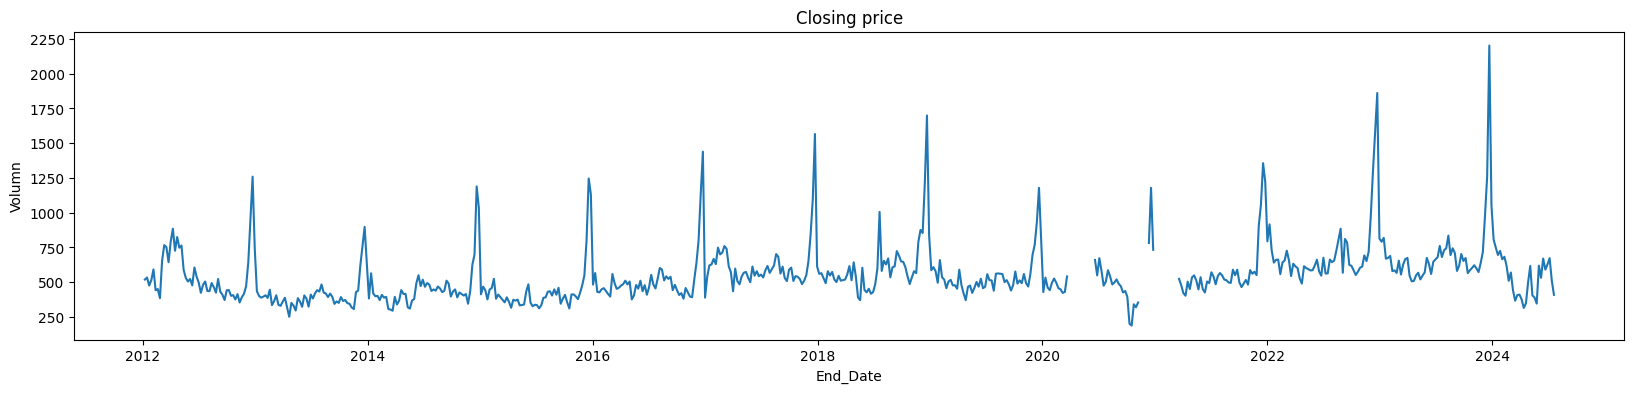

In [42]:
# Plot Alchemist_df with missing values.
plt.figure(figsize=(20, 4))
plt.plot(Alchemist_df.Volume)
plt.xlabel('End_Date')
plt.ylabel('Volumn')
plt.title('Closing price')

Text(0.5, 1.0, 'Closing price')

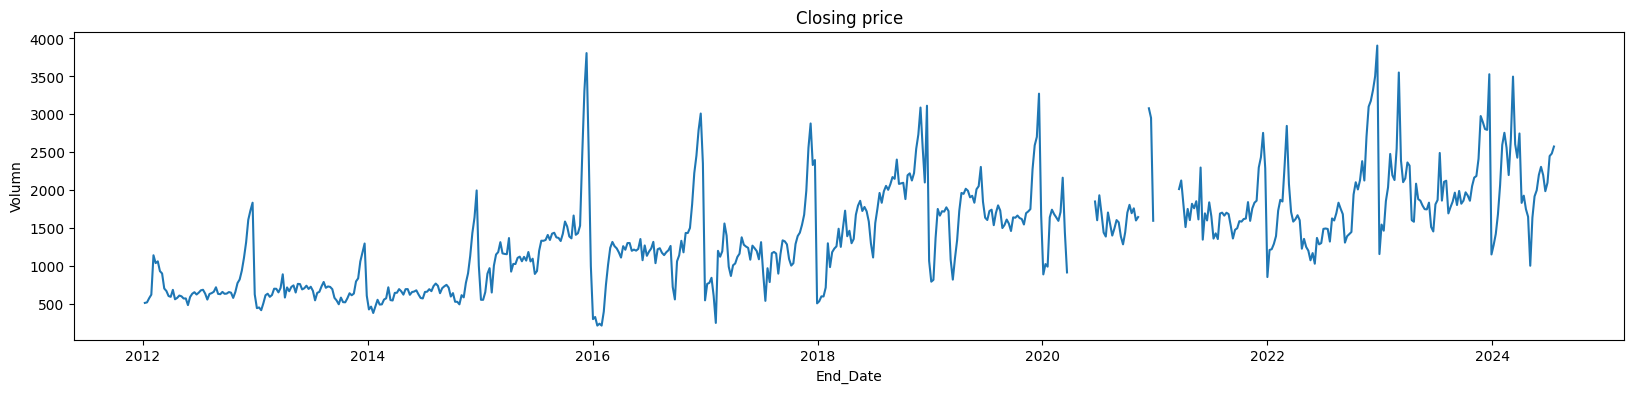

In [43]:
# Plot Caterpillar_df with missing values
plt.figure(figsize=(20, 4))
plt.plot(Caterpillar_df.Volume)
plt.xlabel('End_Date')
plt.ylabel('Volumn')
plt.title('Closing price')

The gaps in the dataset fall within 2020 and 2021,  a period where many bookshops were probabaly closed due to the pandemic. These missing entries may therefore reflect disrupted retail activity, a pause in data collection, or broader data-quality issues.
We will therefore input missing rows with 0, indicating that no sales was made in the thime period.


In [44]:
# Filling missing Values with 0 due to no sales
Alchemist_df = Alchemist_df.Volume.fillna(0)
Caterpillar_df = Caterpillar_df.Volume.fillna(0)
#Alchemist_df = Alchemist_df.Volume.interpolate(method='linear')
#Caterpillar_df = Caterpillar_df.Volume.interpolate(method='linear')

Text(0.5, 1.0, 'Closing price')

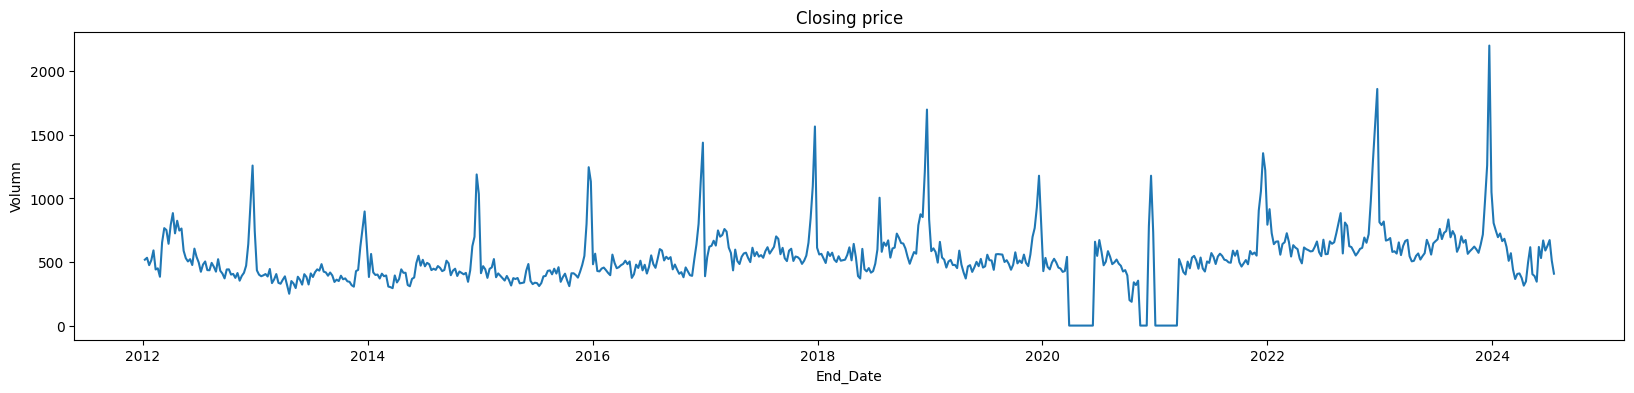

In [45]:
# Plot the dataframe with interpolated Values
plt.figure(figsize=(20, 4))
plt.plot(Alchemist_df)
plt.xlabel('End_Date')
plt.ylabel('Volumn')
plt.title('Closing price')

Text(0.5, 1.0, 'Closing price')

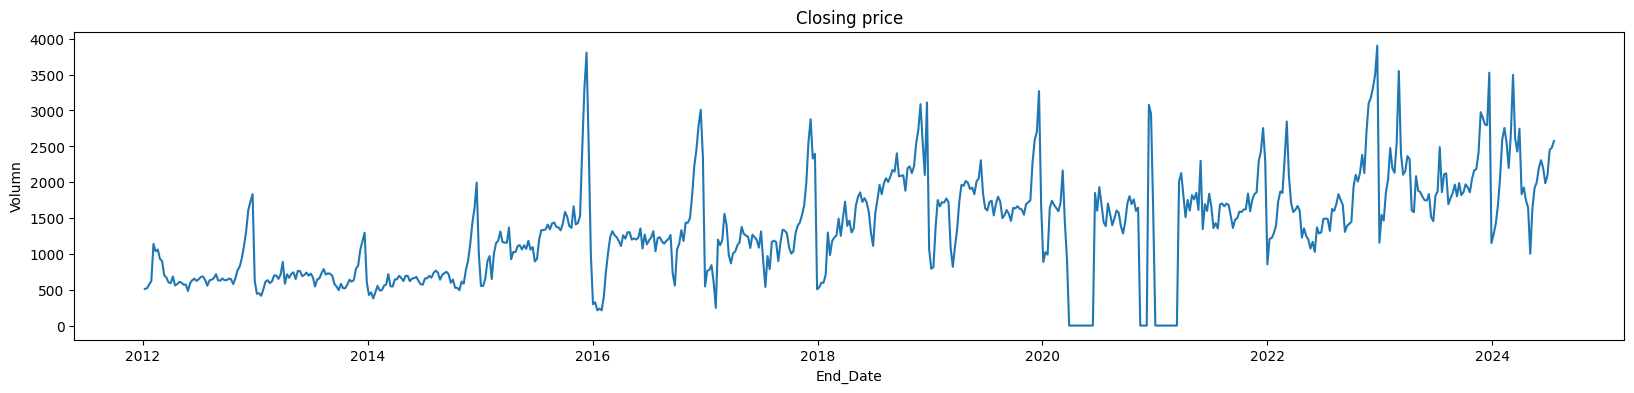

In [46]:
# Plot the dataframe with interpolated Values
plt.figure(figsize=(20, 4))
plt.plot(Caterpillar_df)
plt.xlabel('End_Date')
plt.ylabel('Volumn')
plt.title('Closing price')

### **Classical techniques**

##### **Perform Decomposition of the data for Both books**

Since the dataset contains rows with zero values, an **additive** seasonal model is used for decomposition.

<Figure size 2000x2000 with 0 Axes>

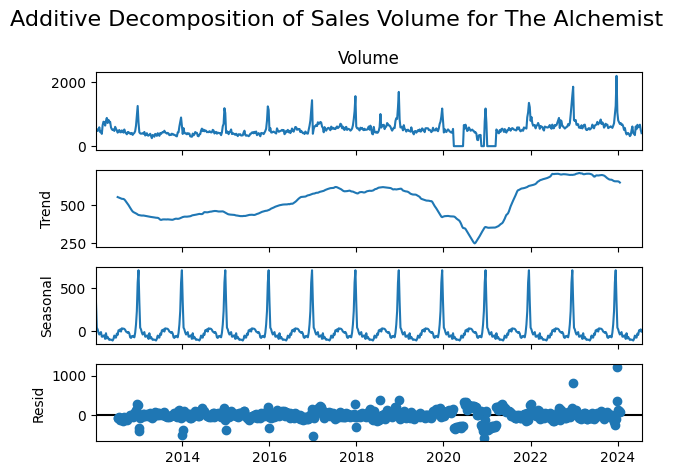

In [47]:
# Perform Decompostion of Alchemist_df
decompose_Alchemist = seasonal_decompose(Alchemist_df, model='additive', period=52)

# Plot the decomposition
plt.figure(figsize=(20, 20))
decompose_Alchemist.plot()
plt.suptitle(f"Additive Decomposition of Sales Volume for The Alchemist", fontsize=16)
plt.tight_layout()
plt.show()

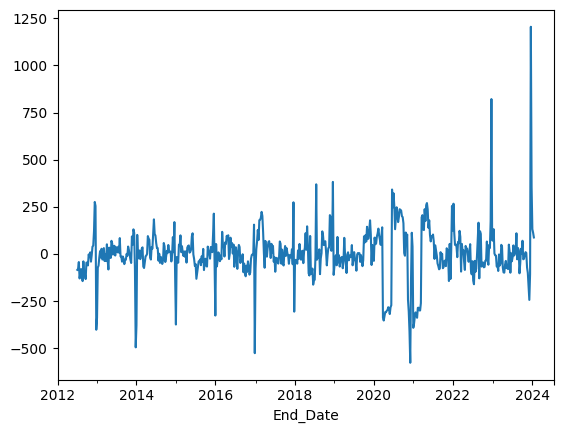

In [48]:
decompose_Alchemist.resid.plot()
plt.show()

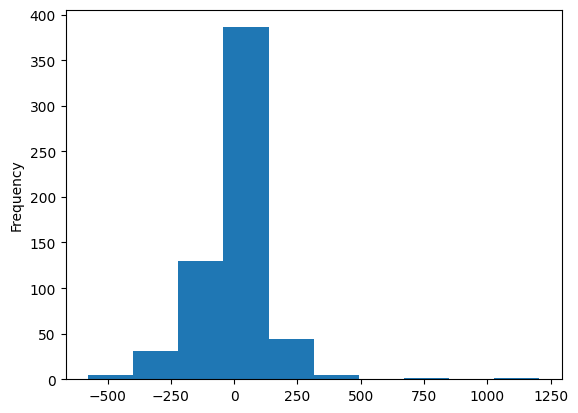

In [49]:
decompose_Alchemist.resid.plot(kind='hist')
plt.show()

<Figure size 2000x2000 with 0 Axes>

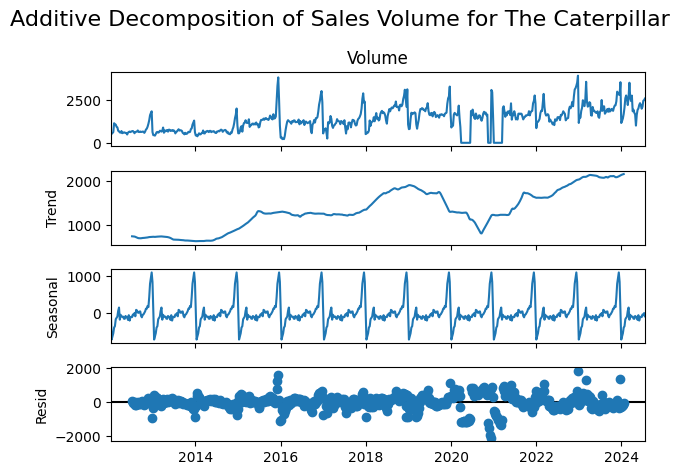

In [50]:
# Perform Decompostion of Caterpillar_df
decompose_Caterpillar = seasonal_decompose(Caterpillar_df, model='Additive', period=52)

# Plot the decomposition
plt.figure(figsize=(20, 20))
decompose_Caterpillar.plot()
plt.suptitle(f"Additive Decomposition of Sales Volume for The Caterpillar", fontsize=16)
plt.tight_layout()
plt.show()

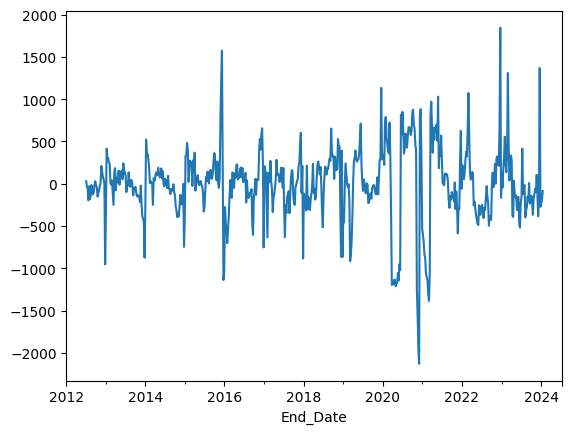

In [51]:
decompose_Caterpillar.resid.plot()
plt.show()

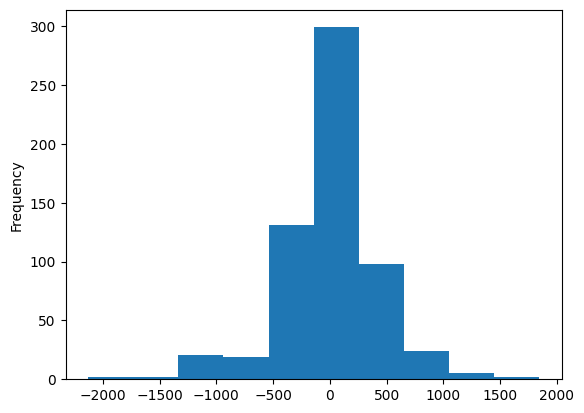

In [52]:
decompose_Caterpillar.resid.plot(kind='hist')
plt.show()

The residual plots show some form of seasonality element, how ever due to the zero (missing number) figures in the dataset the additive model is used for decomposition.

##### **Perform ACF and PACF plots**

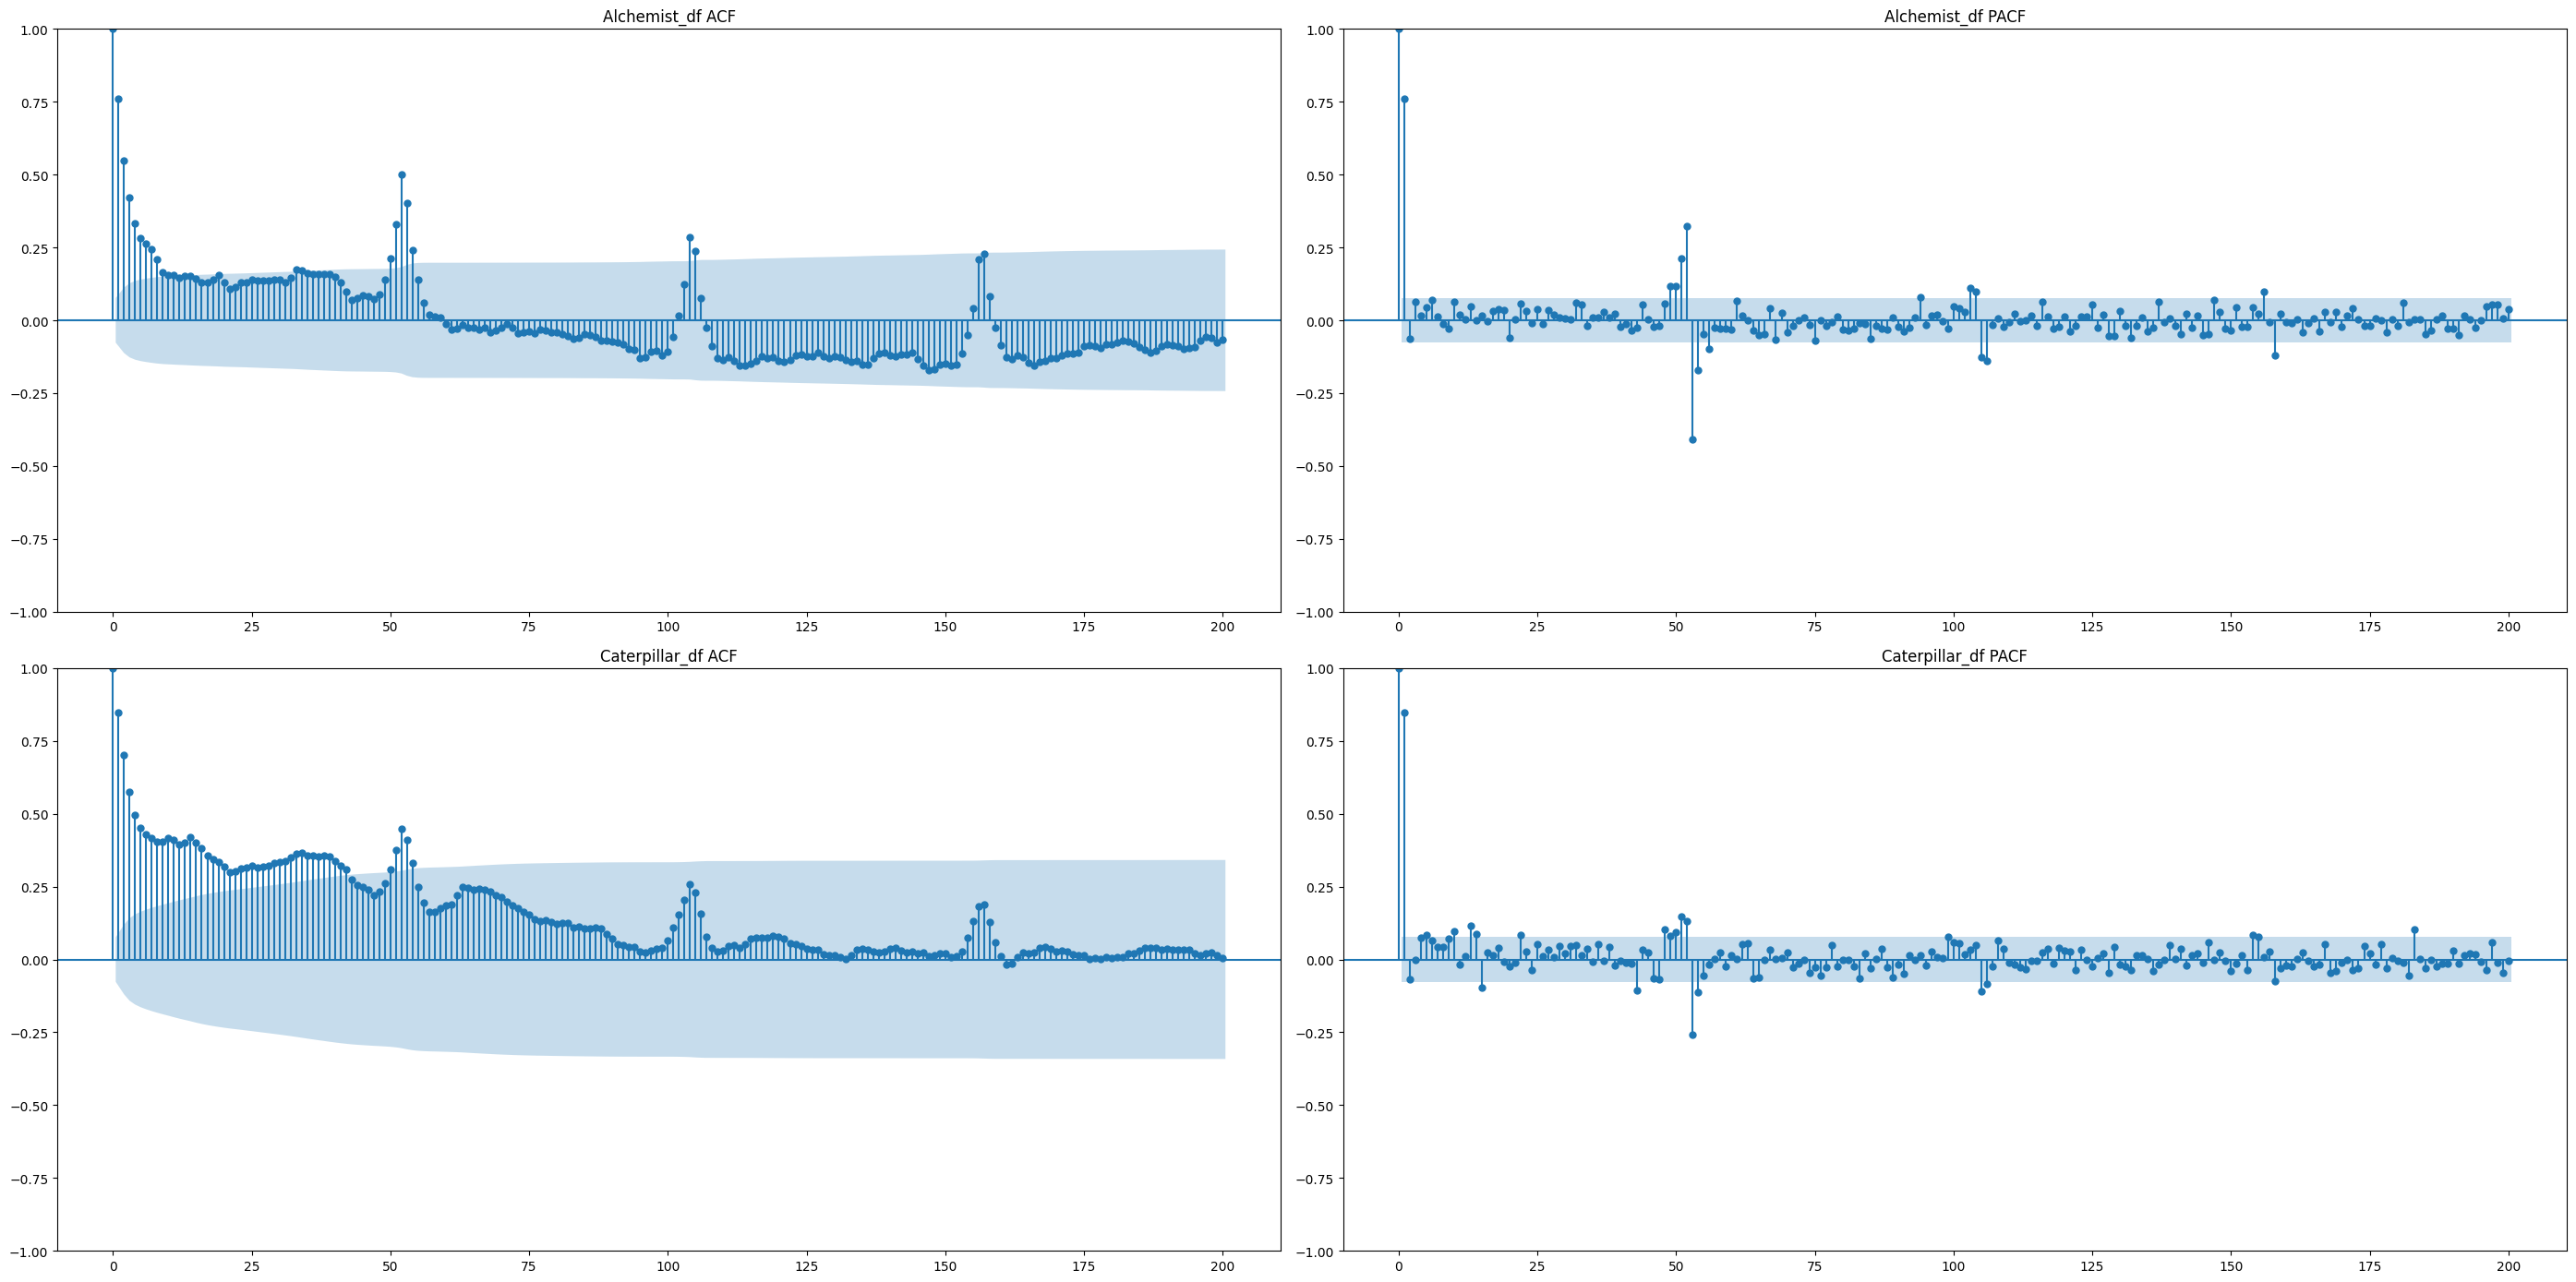

In [53]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(2, 2, figsize=(28, 14))

# Alchemist_df ACF
plot_acf(Alchemist_df.squeeze(), lags=200, ax=axes[0, 0])
axes[0, 0].set_title('Alchemist_df ACF')

# Alchemist_df PACF
plot_pacf(Alchemist_df.squeeze(), lags=200, ax=axes[0, 1])
axes[0, 1].set_title('Alchemist_df PACF')

# Caterpillar_df ACF
plot_acf(Caterpillar_df.squeeze(), lags=200, ax=axes[1, 0])
axes[1, 0].set_title('Caterpillar_df ACF')

# Caterpillar_df PACF
plot_pacf(Caterpillar_df.squeeze(), lags=200, ax=axes[1, 1])
axes[1, 1].set_title('Caterpillar_df PACF')

plt.tight_layout()
plt.show()

The ACF plots for both datasets show strong autocorrelation across several lags, with noticeable spikes just after lag 50 consistent with yearly seasonality in weekly data. Similarly, the PACF plots exhibit pronounced spikes beyond lag 50, suggesting direct relationships at those seasonal intervals.




##### **Stationarity of the data for both books.**

In [54]:
# Check for Stationarity in both books data using ADF
adf_Alchemist = adfuller(Alchemist_df)
print('\nThe Alchemist')
# Perform ADF test on Alchemist_df
print('ADF Statistic: %f' % adf_Alchemist[0])
print('p-value: %f' % adf_Alchemist[1])
print('Number of Lags: %d' % adf_Alchemist[2])
print('Number of Observations Used: %d' % adf_Alchemist[3])


print('\nThe Very Hungry Caterpillar')
# Perform ADF test on Caterpillar_df
adf_Caterpillar = adfuller(Caterpillar_df)
print('ADF Statistic: %f' % adf_Caterpillar[0])
print('p-value: %f' % adf_Caterpillar[1])
print('Number of Lags: %d' % adf_Caterpillar[2])
print('Number of Observations Used: %d' % adf_Caterpillar[3])


The Alchemist
ADF Statistic: -8.295945
p-value: 0.000000
Number of Lags: 2
Number of Observations Used: 652

The Very Hungry Caterpillar
ADF Statistic: -3.060523
p-value: 0.029616
Number of Lags: 14
Number of Observations Used: 640


##### Stationarity Check Results

The Alchemist
ADF test statistic is far below the critical value and the p-value is 0.0 (< 0.05).
This means we reject the null hypothesis of non-stationarity.
Conclusion: The Alchemist time series is stationary.

The Very Hungry Caterpillar
ADF test statistic is relatively close to zero and the p-value is 0.029 (> 0.05).
This means we alos fail to reject the null hypothesis of non-stationarity.
Conclusion: The Very Hungry Caterpillar time series is non-stationary.


In [55]:
# Split both datasets into train and test(forecast) sets
A_x_train = Alchemist_df.iloc[:-32].asfreq('W-SAT')
A_x_test = Alchemist_df.iloc[-32:].asfreq('W-SAT')
C_x_train = Caterpillar_df.iloc[:-32].asfreq('W-SAT')
C_x_test = Caterpillar_df.iloc[-32:].asfreq('W-SAT')

For modelings the last 32 weeks of data will be used as test (forecast) data

In [62]:
A_x_train

End_Date
2012-01-07    518.0
2012-01-14    533.0
2012-01-21    475.0
2012-01-28    514.0
2012-02-04    591.0
              ...  
2023-11-11    599.0
2023-11-18    572.0
2023-11-25    637.0
2023-12-02    716.0
2023-12-09    979.0
Freq: W-SAT, Name: Volume, Length: 623, dtype: float64

In [63]:
C_x_train

End_Date
2012-01-07     512.0
2012-01-14     519.0
2012-01-21     574.0
2012-01-28     621.0
2012-02-04    1140.0
               ...  
2023-11-11    2185.0
2023-11-18    2413.0
2023-11-25    2976.0
2023-12-02    2896.0
2023-12-09    2804.0
Freq: W-SAT, Name: Volume, Length: 623, dtype: float64

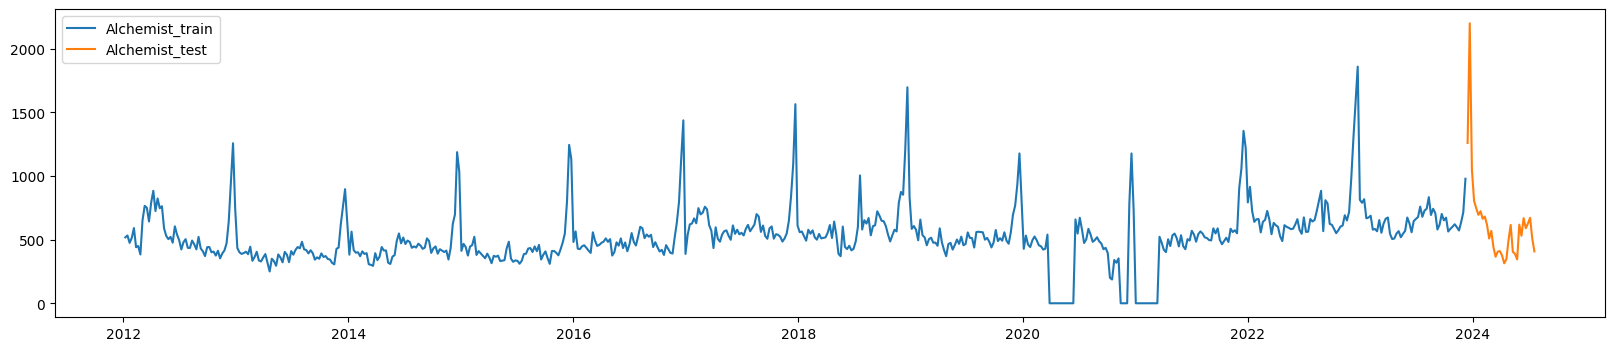

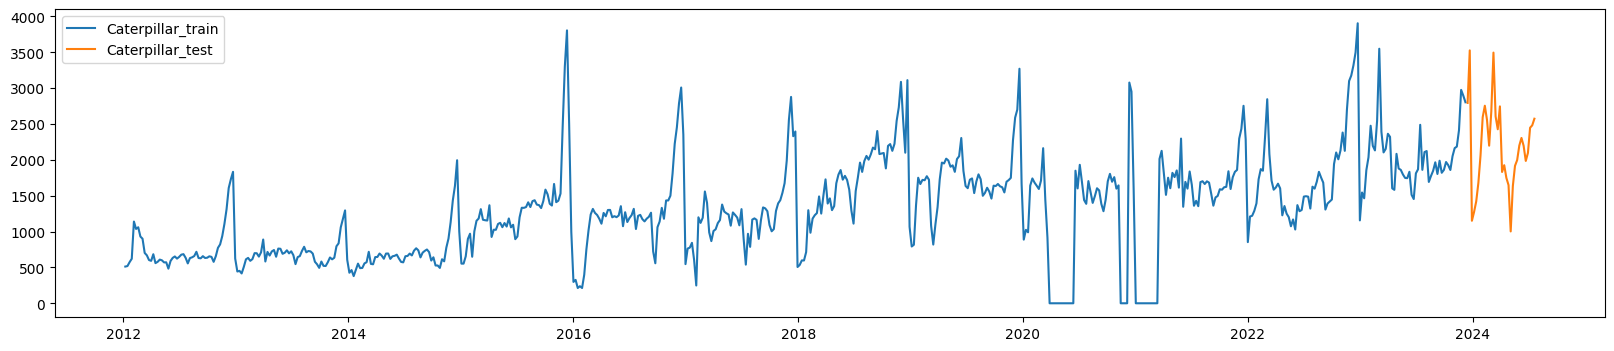

In [64]:
# Plot the train and test splits for both datasets
plt.figure(figsize=(20, 4))
plt.plot(A_x_train, label='Alchemist_train')
plt.plot(A_x_test, label='Alchemist_test')
plt.legend()
plt.show()

plt.figure(figsize=(20, 4))
plt.plot(C_x_train, label='Caterpillar_train')
plt.plot(C_x_test, label='Caterpillar_test')
plt.legend()
plt.show()

#### **Auto ARIMA**

Note: Model was optimized to reduced due to RAM limitations.

In [65]:
A_model = auto_arima(y=A_x_train,
                     seasonal=True,
                     m=52,
                     max_p=2, max_q=2, max_d=1,
                     max_P=1, max_Q=1, max_D=1,
                     n_jobs=1,
                     maxiter=50,
                     stepwise=True, suppress_warnings=True, trace=True)
# Print model result
A_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=19.70 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=7990.293, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=inf, Time=6.33 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=7838.866, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=7988.309, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[52] intercept   : AIC=7990.623, Time=0.08 sec
 ARIMA(0,1,1)(1,0,1)[52] intercept   : AIC=7655.665, Time=9.07 sec
 ARIMA(0,1,1)(1,0,0)[52] intercept   : AIC=7708.346, Time=5.17 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=7696.062, Time=6.42 sec
 ARIMA(1,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=14.11 sec
 ARIMA(0,1,2)(1,0,1)[52] intercept   : AIC=7637.139, Time=11.57 sec
 ARIMA(0,1,2)(0,0,1)[52] intercept   : AIC=7807.908, Time=4.30 sec
 ARIMA(0,1,2)(1,0,0)[52] intercept   : AIC=7685.867, Time=9.22 sec
 ARIMA(0,1,2)(0,0,0)[52] intercept   : AIC=7955.193, Time=0.25 sec
 ARIMA(1,1,2)(1,0,1)[52] interc

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  623
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 52)   Log Likelihood               -3812.571
Date:                              Mon, 18 Aug 2025   AIC                           7635.142
Time:                                      06:58:39   BIC                           7657.306
Sample:                                  01-07-2012   HQIC                          7643.756
                                       - 12-09-2023                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3039      0.023    -13.077      0.000      -0.349      -0.258
ma.L2         -0.1904      0.031     -6.059      0.000      -0.252      -0.129
ar.S.L52       0.8693      0.018     49.223      0.000       0.835       0.904
ma.S.L52      -0.4189      0.030    -13.962      0.000      -0.478      -0.360
sigma2      1.164e+04    314.939     36.953      0.000     1.1e+04    1.23e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):              1722.13
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               3.01   Skew:                             0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
if A_model.arima_res_.mle_retvals['converged']:
    print("Model converged successfully.")
else:
    print("Model did not converge.")

Model converged successfully.


In [67]:
C_model = auto_arima(y=C_x_train,
                     seasonal=True,
                     m=52,
                     max_p=2, max_q=2, max_d=1,
                     max_P=1, max_Q=1, max_D=1,
                     n_jobs=1,
                     maxiter=50,
                     stepwise=True, suppress_warnings=True, trace=True)
# Print model result
C_model.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[52] intercept   : AIC=inf, Time=18.72 sec
 ARIMA(0,1,0)(0,0,0)[52] intercept   : AIC=9140.609, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[52] intercept   : AIC=9056.517, Time=7.34 sec
 ARIMA(0,1,1)(0,0,1)[52] intercept   : AIC=9086.169, Time=3.75 sec
 ARIMA(0,1,0)(0,0,0)[52]             : AIC=9138.670, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[52] intercept   : AIC=9142.482, Time=0.05 sec
 ARIMA(1,1,0)(1,0,1)[52] intercept   : AIC=9035.189, Time=7.17 sec
 ARIMA(1,1,0)(0,0,1)[52] intercept   : AIC=9086.201, Time=4.20 sec
 ARIMA(0,1,0)(1,0,1)[52] intercept   : AIC=9035.654, Time=6.63 sec
 ARIMA(2,1,0)(1,0,1)[52] intercept   : AIC=9032.876, Time=15.42 sec
 ARIMA(2,1,0)(0,0,1)[52] intercept   : AIC=9085.092, Time=4.44 sec
 ARIMA(2,1,0)(1,0,0)[52] intercept   : AIC=9055.139, Time=5.85 sec
 ARIMA(2,1,0)(0,0,0)[52] intercept   : AIC=9140.826, Time=0.09 sec
 ARIMA(2,1,1)(1,0,1)[52] intercept   : AIC=inf, Time=20.65 sec
 ARIMA(1,1,1)(1,0,1)[52] i

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  623
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 52)   Log Likelihood               -4484.485
Date:                            Mon, 18 Aug 2025   AIC                           8978.969
Time:                                    07:02:55   BIC                           9001.134
Sample:                                01-07-2012   HQIC                          8987.583
                                     - 12-09-2023                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7747      0.028     27.973      0.000       0.720       0.829
ma.L1         -0.9749      0.011    -92.757      0.000      -0.995      -0.954
ar.S.L52       0.7528      0.043     17.522      0.000       0.669       0.837
ma.S.L52      -0.4473      0.059     -7.635      0.000      -0.562      -0.332
sigma2      1.048e+05   2972.339     35.269      0.000     9.9e+04    1.11e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):              5816.56
Prob(Q):                              0.34   Prob(JB):                         0.00
Heteroskedasticity (H):               5.28   Skew:                             0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.87
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [68]:
if C_model.arima_res_.mle_retvals['converged']:
    print("Model converged successfully.")
else:
    print("Model did not converge.")

Model converged successfully.


**Comment on the best model provided by Auto ARIMA - The Alchemist**

**SARIMA(0,1,2)(1,0,1)[52]**

The model applies first-order differencing to remove non-seasonal trends, uses two non seasonal moving average terms to smooth short-term noise. The seasonal AR and MA terms capture yearly patterns, crucial for weekly data with annual seasonality and no seasonal differencing was needed, implying stable seasonal patterns over time.The Ljung–Box p-value for The Alchemist dataset is 0.07, suggesting that the ARIMA models have successfully captured the underlying structure in both series, and are therefore a good fit.

**ARIMA - The Very Hungry Caterpillar**

**SARIMA(1,1,1)(1,0,1)[52]**

The model also applies first-order differencing to remove non-seasonal trends, uses one non seasonal moving average terms to smooth short-term noise and uses the previous week’s error to smooth out short-term random fluctuations. The model links current sales to sales from the same week last year. Captures annual seasonal patterns, uses the error from the same week last year to adjust predictions, smoothing seasonal noise. No seasonal differencing was needed. The Ljung–Box p-value for The Very Hungry Caterpillar is 0.90 suggesting that the ARIMA models have successfully captured the underlying structure in both series, and are therefore a good fit.


However the elevated AICs, indication of some heteroskedasticity  and high kurtosis residual suggest that further tuning, may improve forecast reliability in both models.

##### **Residuals from both model**

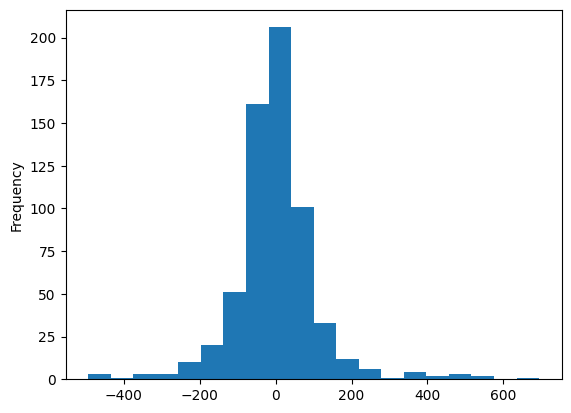

In [69]:
# Plot histogram of residuals
A_model.resid().plot(kind='hist', bins=20)
plt.show()

<Axes: xlabel='End_Date'>

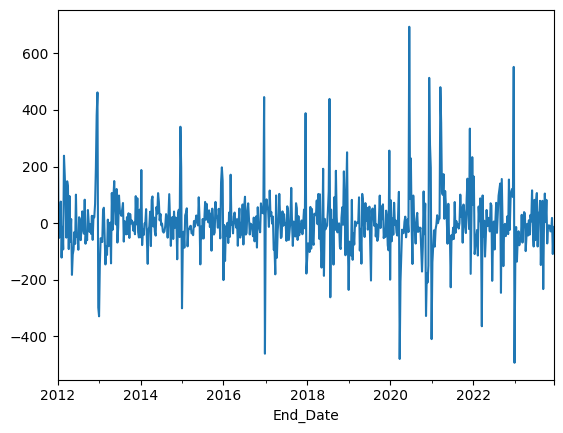

In [70]:
A_model.resid().plot()

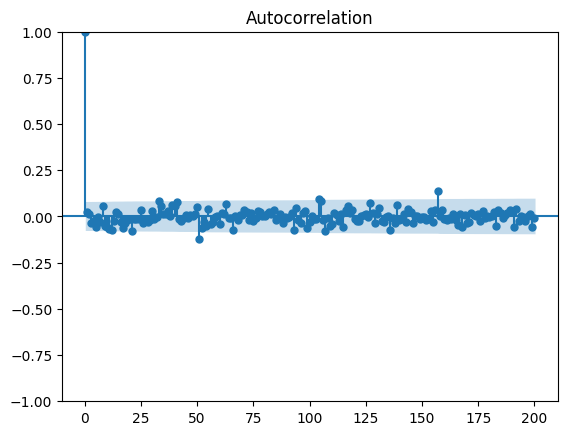

In [71]:
# ACF plot on residuals ARIMA Alchemist
plot_acf(A_model.resid(), lags=200)
plt.show()

The histogram of the residuals from the Auto ARIMA model trained on the Alchemist dataset exhibits characteristics consistent with white noise, with a mean centered around zero. The Ljung-Box test yields a high p-value, indicating that the model has effectively captured the underlying seasonality.

However, the time series plot of the residuals reveals recurring spikes at the start of each year, suggesting potential seasonal effects that remain partially unaccounted for. Additionally, the ACF plot shows a minor spike just above the significance bounds, implying that some autocorrelation persists.

While these observations suggest the model could benefit from further fine-tuning particularly in addressing residual seasonality, such refinements are constrained by the project's time limitations.


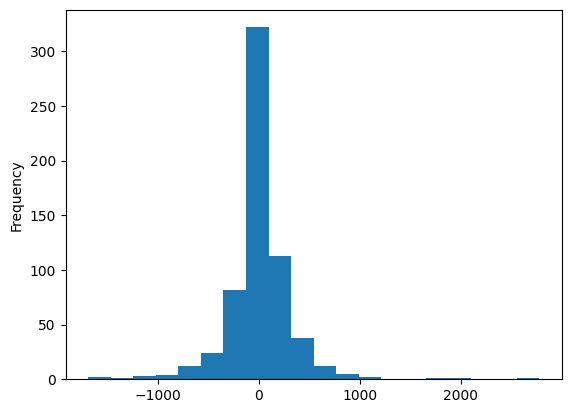

In [72]:
# Plot histogram of residuals
C_model.resid().plot(kind='hist', bins=20)
plt.show()

<Axes: xlabel='End_Date'>

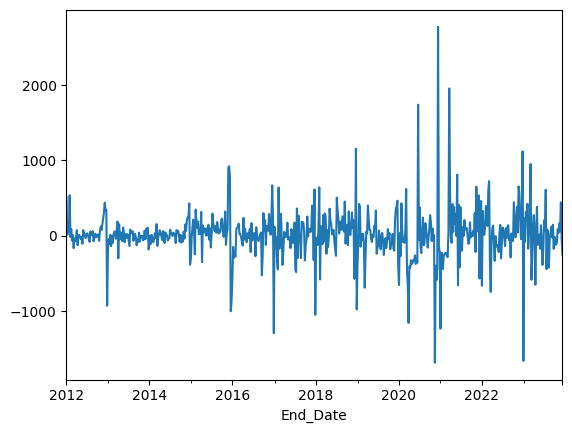

In [73]:
C_model.resid().plot()

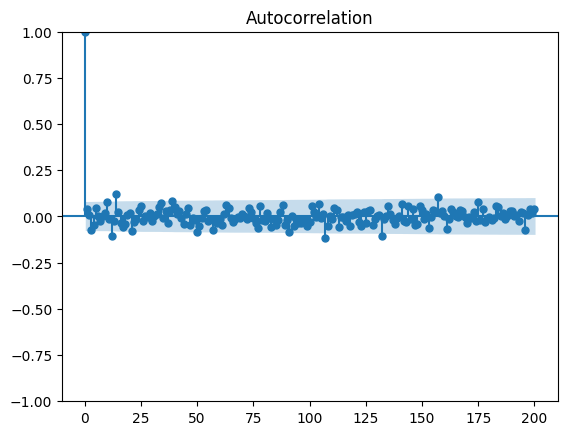

In [74]:
# ACF plot on residuals ARIMA Caterpillar
plot_acf(C_model.resid(), lags=200)
plt.show()

The histogram of the residuals from the Auto ARIMA model trained on the Very Hungry Caterpillar dataset displays behavior consistent with white noise, with a mean centered around zero. Unlike the residuals from the Alchemist model, the ACF plot here shows no significant spikes at regular intervals, further supporting the absence of autocorrelation.

The Ljung-Box test yields a p-value above 0.05, suggesting that the model has adequately captured the underlying seasonality. The time series plot of the residuals fluctuates around zero, as expected, but exhibits periods of elevated variance and subtle seasonal patterns within certain intervals.

These findings indicate that while the model performs reasonably well, there remains potential for refinement particularly in stabilizing residual variance and addressing seasonal behavior.


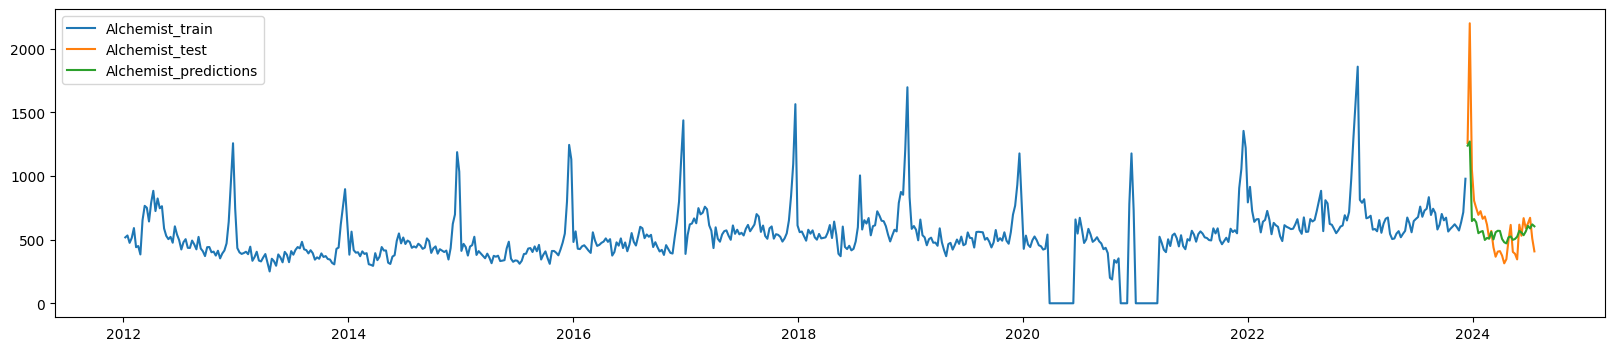

ARIMA Model MAE: 139.01040717370975
ARIMA Model MAPE: 0.22910949247647275


In [75]:
# Plot Auto ARIMA predictions
A_predictions = A_model.predict(n_periods=32)
C_predictions = C_model.predict(n_periods=32)

plt.figure(figsize=(20, 4))
plt.plot(A_x_train, label='Alchemist_train')
plt.plot(A_x_test, label='Alchemist_test')
plt.plot(A_predictions, label='Alchemist_predictions')
plt.legend()
plt.show()

# Calculate MAE and MAPE
A_mae_ARIMA = mean_absolute_error(A_x_test, A_predictions)
A_mape_ARIMA = mean_absolute_percentage_error(A_x_test, A_predictions)

print('ARIMA Model MAE:', A_mae_ARIMA)
print('ARIMA Model MAPE:', A_mape_ARIMA)

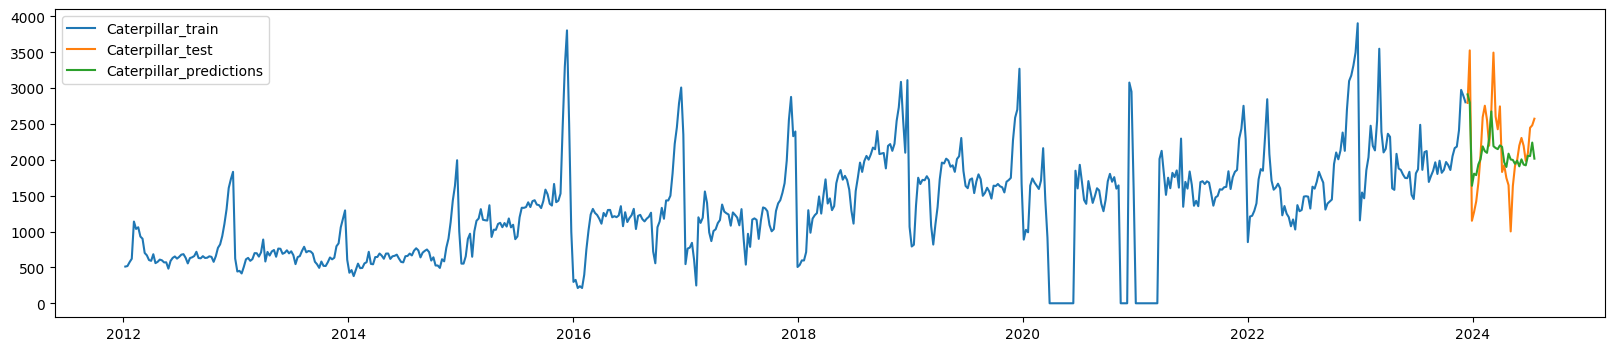

ARIMA Model MAE: 351.1670122364998
ARIMA Model MAPE: 0.22910949247647275


In [76]:
# Plot Auto ARIMA prediction of The Very Hungry Caterpilar
plt.figure(figsize=(20,4))
plt.plot(C_x_train, label='Caterpillar_train')
plt.plot(C_x_test, label='Caterpillar_test')
plt.plot(C_predictions, label='Caterpillar_predictions')
plt.legend()
plt.show()

# Calculate MAE and MAPE
C_mae_ARIMA = mean_absolute_error(C_x_test, C_predictions)
C_mape_ARIMA = mean_absolute_percentage_error(C_x_test, C_predictions)

print('ARIMA Model MAE:', C_mae_ARIMA)
print('ARIMA Model MAPE:', A_mape_ARIMA)

The ARIMA model for both books captures key temporal patterns however the relatively high AIC and signs of residual non-normality and heteroskedasticity in the residuals suggest that further tuning, may improve forecast reliability.
Average MAPE for both models at about 22.9%, reflects that predictions deviate by ~23% on average from actual values.

### **Machine Learning (XGBoost)**

In [77]:
# Using Previous split for train and test sets for both books
print(A_x_train.shape)
print(A_x_test.shape)
print(C_x_train.shape)
print(C_x_test.shape)

(623,)
(32,)
(623,)
(32,)


Alchemist_test_sequences = create_input_output_sequences_xgb(look_back, forecast, A_x_train)
Caterpillar_test_sequences = create_input_output_sequences_xgb(look_back, forecast, C_x_train)

In [78]:
# Prepare the data to feed into the XGBoost Model with the same 32 weeks forecast horizon
A_x_train.index = pd.PeriodIndex(A_x_train.index, freq='W')
A_x_test.index = pd.PeriodIndex(A_x_test.index, freq='W')
C_x_train.index = pd.PeriodIndex(C_x_train.index, freq='W')
C_x_test.index = pd.PeriodIndex(C_x_test.index, freq='W')

Note: Due to Zeros from weeks with no sales additive seasonality will be used for deseasonalizing in the XGBoost model

##### The Alchemist

In [79]:
# Create a pipeline with a detrender and a deseasonaliser.
def create_predictor_with_deseasonaliser_xgboost(sp=52, degree=1):

    regressor = XGBRegressor(base_score=0.5,
                      n_estimators=400,
                      min_child_weight=1,
                      max_depth=7,
                      learning_rate=0.1,
                      booster='gbtree',
                      tree_method='exact', # 'gpu_hist'
                      reg_alpha=0,
                      subsample=0.5,
                      validate_parameters=1,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      colsample_bytree=1,
                      gamma=0
                    )
    forecaster = TransformedTargetForecaster(
        [
            ("deseasonalize", Deseasonalizer(model="additive", sp=sp)),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=degree))),
            (
                "forecast",
                make_reduction(regressor, window_length=52, strategy="recursive"),
            ),
        ]
    )

    return forecaster

In [80]:
# Perform a grid search with cross-validation.
def grid_search_predictor(train, test, predictor, param_grid):

    # Grid search on window_length
    cv = ExpandingWindowSplitter(initial_window=int(len(train) * 0.7))
    gscv = ForecastingGridSearchCV(
        predictor, strategy="refit", cv=cv, param_grid=param_grid,
        scoring=MeanAbsolutePercentageError(symmetric=True), error_score='raise'
    )
    gscv.fit(train)
    print(f"Best parameters: {gscv.best_params_}")

    # Forecasting
    future_horizon = np.arange(len(test)) + 1
    predictions = gscv.predict(fh=future_horizon)

    return predictions

In [81]:
A_predictor = create_predictor_with_deseasonaliser_xgboost()

# Set window_length values to conduct a grid search.
param_grid = {"forecast__window_length": [12, 18, 24, 30, 36, 52]}

# Perform a grid search(hyperparameter Tune of the forecast window lenght) and use it to forecast.
A_predictions2 = grid_search_predictor(
    A_x_train, A_x_test, A_predictor, param_grid)

Best parameters: {'forecast__window_length': 12}


In [82]:
A_predictions2

2023-12-11/2023-12-17    1156.440516
2023-12-18/2023-12-24     715.029361
2023-12-25/2023-12-31     446.016165
2024-01-01/2024-01-07     385.145607
2024-01-08/2024-01-14     379.074786
2024-01-15/2024-01-21     328.569535
2024-01-22/2024-01-28     351.738322
2024-01-29/2024-02-04     338.983434
2024-02-05/2024-02-11     304.726629
2024-02-12/2024-02-18     283.294289
2024-02-19/2024-02-25     286.577358
2024-02-26/2024-03-03     318.332560
2024-03-04/2024-03-10     278.203704
2024-03-11/2024-03-17     355.990420
2024-03-18/2024-03-24     282.486243
2024-03-25/2024-03-31     311.656108
2024-04-01/2024-04-07     302.960006
2024-04-08/2024-04-14     285.077592
2024-04-15/2024-04-21     294.057906
2024-04-22/2024-04-28     288.132228
2024-04-29/2024-05-05     290.212150
2024-05-06/2024-05-12     279.444078
2024-05-13/2024-05-19     306.446328
2024-05-20/2024-05-26     327.573271
2024-05-27/2024-06-02     325.365341
2024-06-03/2024-06-09     298.124147
2024-06-10/2024-06-16     380.176507
2024-06-17/2024-06-23     331.368710
2024-06-24/2024-06-30     402.763362
2024-07-01/2024-07-07     389.518787
2024-07-08/2024-07-14     405.294750
2024-07-15/2024-07-21     383.814144
Freq: W-SUN, Name: Volume, dtype: float64

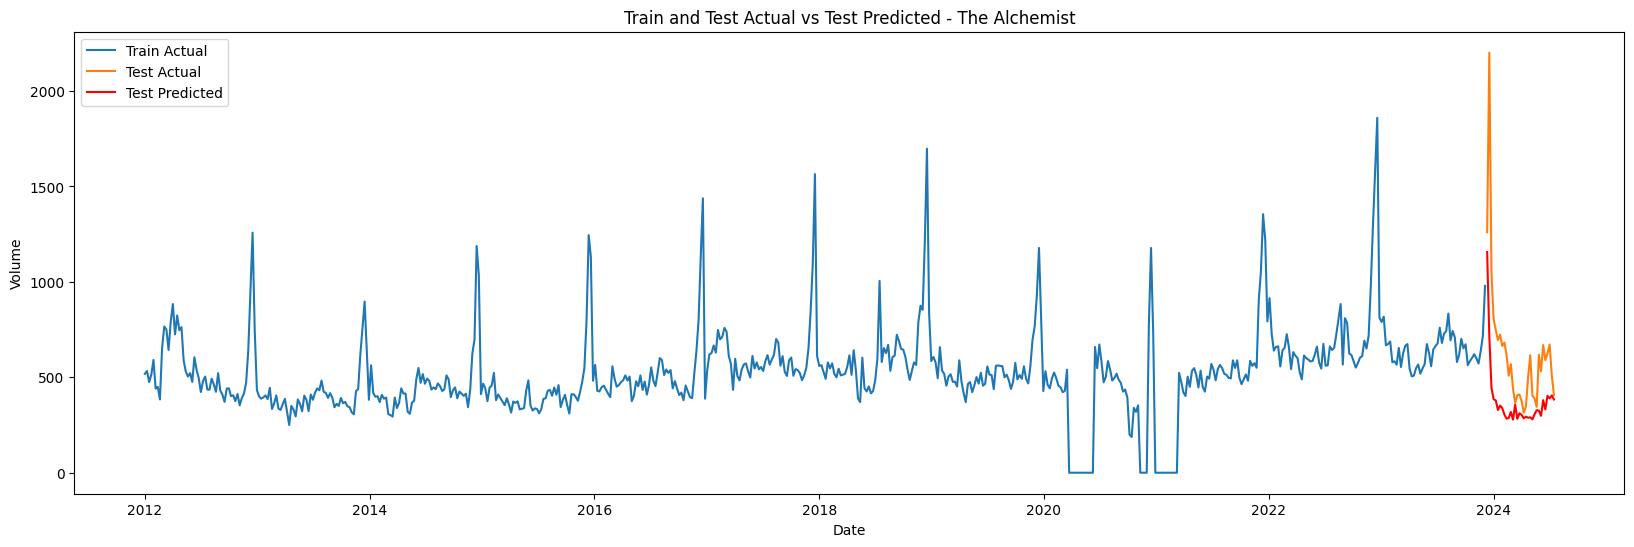

XGboost MAE: 257.76
XGboost MAPE: 36.17%


In [83]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in A_x_train.index]
test_dates = [p.start_time for p in A_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, A_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, A_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, A_predictions2, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Alchemist')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

A_mae_xgb = mean_absolute_error(A_x_test, A_predictions2)
A_mape_xgb = mean_absolute_percentage_error(A_x_test, A_predictions2)

print(f"XGboost MAE: {A_mae_xgb:.2f}")
print(f"XGboost MAPE: {A_mape_xgb:.2%}")

##### The Very Hungry Caterpillar

Using the previously built XGBoost model

In [84]:
C_predictor = create_predictor_with_deseasonaliser_xgboost()

# Set window_length values to conduct a grid search.
param_grid = {"forecast__window_length": [12, 18, 24, 30, 36, 52]}

# Perform a grid search(hyperparameter Tune of the forecast window lenght) and use it to forecast.
C_predictions2 = grid_search_predictor(
    C_x_train, C_x_test, C_predictor, param_grid)

Best parameters: {'forecast__window_length': 18}


In [85]:
C_predictions2

2023-12-11/2023-12-17    2528.362241
2023-12-18/2023-12-24    1580.311077
2023-12-25/2023-12-31     870.488979
2024-01-01/2024-01-07    1156.412894
2024-01-08/2024-01-14    1258.852547
2024-01-15/2024-01-21    1269.870141
2024-01-22/2024-01-28    1287.460901
2024-01-29/2024-02-04    1440.051484
2024-02-05/2024-02-11    1449.610589
2024-02-12/2024-02-18    1504.707643
2024-02-19/2024-02-25    1659.625643
2024-02-26/2024-03-03    1697.600841
2024-03-04/2024-03-10    1425.635329
2024-03-11/2024-03-17    1576.769403
2024-03-18/2024-03-24    1494.743456
2024-03-25/2024-03-31    1586.574047
2024-04-01/2024-04-07    1537.679667
2024-04-08/2024-04-14    1476.383711
2024-04-15/2024-04-21    1520.600543
2024-04-22/2024-04-28    1675.989826
2024-04-29/2024-05-05    1494.997082
2024-05-06/2024-05-12    1586.472059
2024-05-13/2024-05-19    1526.037281
2024-05-20/2024-05-26    1579.163080
2024-05-27/2024-06-02    1584.101182
2024-06-03/2024-06-09    1591.734296
2024-06-10/2024-06-16    1551.996352
2024-06-17/2024-06-23    1707.519670
2024-06-24/2024-06-30    1715.649205
2024-07-01/2024-07-07    1648.296349
2024-07-08/2024-07-14    1636.157195
2024-07-15/2024-07-21    1607.821627
Freq: W-SUN, Name: Volume, dtype: float64

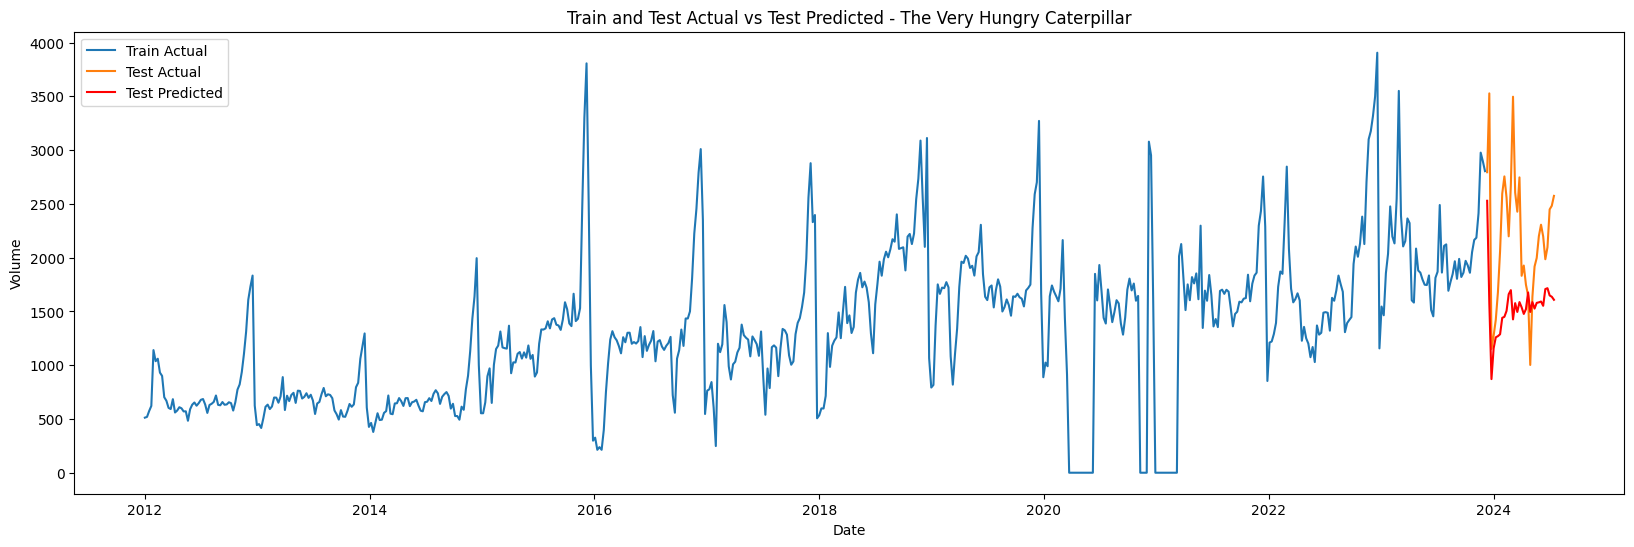

XGboost MAE: 680.29
XGboost MAPE: 28.67%


In [86]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in C_x_train.index]
test_dates = [p.start_time for p in C_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, C_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, C_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, C_predictions2, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Very Hungry Caterpillar')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Display the MAE and MAPE
C_mae_xgb = mean_absolute_error(C_x_test, C_predictions2)
C_mape_xgb = mean_absolute_percentage_error(C_x_test, C_predictions2)

print(f"XGboost MAE: {C_mae_xgb:.2f}")
print(f"XGboost MAPE: {C_mape_xgb:.2%}")

XGBoost underperformed compared to Auto ARIMA across both datasets.

* **Alchemist**: XGBoost MAPE ≈ 36%, Auto ARIMA ≈ 23%
* **The Very Hungry Caterpillar**: XGBoost MAPE ≈ 28%, Auto ARIMA ≈ 23%

This gap likely stems from XGBoost being designed for multi-feature regression rather than univariate time-series forecasting. The model also relied on an *additive* deseasonalizer because both datasets contain weeks with zero sales. A *multiplicative* deseasonalizer might improve performance;  provided zero sales weeks are first handled appropriately.

Due to time constraints, this alternative configuration was not explored.


### **Deep Learning (LSTM model)**

In [87]:
!pip install keras-tuner

In [88]:
# A fuction to normalize both datasets
def normalize_multiple_time_series(dfs, feature_range=(0, 1)):
    """
    Normalize multiple single-column time series DataFrames.

    Parameters:
        dfs (dict): dictionary of {name: DataFrame}
        feature_range (tuple): range for normalization (default 0 to 1)

    Returns:
        dict: {
            '<name>_sequence_data': normalized values,
            '<name>_scaler': fitted scaler,
            '<name>_index': original index
        }
    """
    results = {}

    for name, df in dfs.items():
        values = df.values.reshape(-1, 1)
        scaler = MinMaxScaler(feature_range=feature_range)
        normalized_values = scaler.fit_transform(values)

        results[f"{name}_sequence_data"] = normalized_values
        results[f"{name}_scaler"] = scaler
        results[f"{name}_index"] = df.index

    return results


In [89]:
# Normalize both datasets with normalize_multiple_time_series for the LSTM
dfs = {
    "Alchemist": Alchemist_df,
    "Caterpillar": Caterpillar_df
}

normalized_results = normalize_multiple_time_series(dfs)

Alchemist_sequence_data = normalized_results['Alchemist_sequence_data']
Alchemist_scaler = normalized_results['Alchemist_scaler']

Caterpillar_sequence_data = normalized_results['Caterpillar_sequence_data']
Caterpillar_scaler = normalized_results['Caterpillar_scaler']


In [90]:
# Prepare data into squences for LSTM

def prepare_multi_step_sequences(dfs_sequence_data, lookback, forecast):
    """
    Prepare input-output sequences for multiple time series for LSTM.

    Parameters:
        dfs_sequence_data (dict): {name: normalized_sequence_data}
        lookback (int): number of past steps for input
        forecast (int): number of steps to predict

    Returns:
        dict: {
            name: {
                "input_sequences": np.array(...),
                "output_sequences": np.array(...),
                "last_available_input_sequence": np.array(...)
            }
        }
    """
    def create_input_sequences(lookback, forecast, sequence_data):
        input_sequences = []
        output_sequences = []

        for i in range(lookback, len(sequence_data) - forecast + 1):
            input_sequences.append(sequence_data[i - lookback: i])
            output_sequences.append(sequence_data[i: i + forecast])

        return input_sequences, output_sequences

    results = {}

    for name, sequence_data in dfs_sequence_data.items():
        input_seq, output_seq = create_input_sequences(lookback, forecast, sequence_data)
        input_seq = np.array(input_seq)
        output_seq = np.array(output_seq)
        last_input = sequence_data[-lookback:].reshape(1, lookback, 1)

        results[name] = {
            "input_sequences": input_seq,
            "output_sequences": output_seq,
            "last_available_input_sequence": last_input
        }

    return results

In [91]:
# Prepare data for LSTM using prepare_multi_step_sequences
dfs_sequence_data = {
    "Alchemist": Alchemist_sequence_data,
    "Caterpillar": Caterpillar_sequence_data
}

multi_step_lookback = 52
multi_step_forecast = 32

multi_step_sequences = prepare_multi_step_sequences(dfs_sequence_data, multi_step_lookback, multi_step_forecast)

# Access Alchemist sequences
Alchemist_input_sequences = multi_step_sequences['Alchemist']['input_sequences']
Alchemist_output_sequences = multi_step_sequences['Alchemist']['output_sequences']
Alchemist_last_input = multi_step_sequences['Alchemist']['last_available_input_sequence']

# Access Caterpillar sequences
Caterpillar_input_sequences = multi_step_sequences['Caterpillar']['input_sequences']
Caterpillar_output_sequences = multi_step_sequences['Caterpillar']['output_sequences']
Caterpillar_last_input = multi_step_sequences['Caterpillar']['last_available_input_sequence']


In [92]:
for name, sequences in multi_step_sequences.items():
    print(f"{name}:")
    print("  Input shape :", sequences['input_sequences'].shape)
    print("  Output shape:", sequences['output_sequences'].shape)
    print()

Alchemist:
  Input shape : (572, 52, 1)
  Output shape: (572, 32, 1)

Caterpillar:
  Input shape : (572, 52, 1)
  Output shape: (572, 32, 1)



In [93]:
# Build and Tune Multi-Step LSTM Model with Random Search


def build_and_tune_multi_step(input_sequences, output_sequences, lookback, forecast, nodes=60, max_trials=5, epochs=50, batch_size=32):
    """
    Builds and tunes a multi-step LSTM model using RandomSearch.

    Returns the best model and tuner.
    """

    def tuned_model(hp):
      model = Sequential()
      model.add(LSTM(units=hp.Int('lstm_units', min_value=nodes//2, max_value=nodes*2, step=10),
                   return_sequences=True, input_shape=(lookback, 1)))
      model.add(Dropout(0.2))
      model.add(LSTM(units=hp.Int('lstm_units2', min_value=nodes//2, max_value=nodes*2, step=10)))
      model.add(Dropout(0.2))
      model.add(Dense(forecast))
      model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
      return model


    tuner = RandomSearch(
        tuned_model,
        objective='mse',
        max_trials=max_trials,
        executions_per_trial=1,
        directory='tuner_dir',
        project_name='multi_step_lstm'
    )

    tuner.search(input_sequences, output_sequences, epochs=epochs, batch_size=batch_size, verbose=1)

    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model, tuner


def train_multi_step_datasets(datasets, lookback, forecast, nodes=60, max_trials=10, epochs=100, batch_size=32):
    """
    Train multi-step LSTM models for multiple datasets using a tuner.

    Parameters:
        datasets (dict): {"name": (input_sequences, output_sequences)}
        lookback (int): number of past steps
        forecast (int): number of future steps to predict
        nodes (int): base number of LSTM units
        max_trials (int): max trials for tuner
        epochs (int): training epochs per trial
        batch_size (int): training batch size

    Returns:
        dict: {"name": {"model": best_model, "tuner": tuner}}
    """
    trained_models = {}

    for name, (input_seq, output_seq) in datasets.items():
        print(f"\nTraining dataset: {name}")
        best_model, tuner = build_and_tune_multi_step(
            input_seq, output_seq, lookback, forecast, nodes, max_trials, epochs, batch_size
        )
        trained_models[name] = {"model": best_model, "tuner": tuner}

    return trained_models

In [94]:
# Train Multi-Step LSTM Models for Multiple Datasets from Scratch

def train_multi_step_datasets(datasets, lookback, forecast, nodes=60, max_trials=5, epochs=50, batch_size=32):
    """
    Train multi-step LSTM models for multiple datasets using a tuner.
    Always reruns from scratch instead of reloading previous tuner.

    Parameters:
        datasets (dict): {"name": (input_sequences, output_sequences)}
        lookback (int): number of past steps
        forecast (int): number of future steps to predict
        nodes (int): base number of LSTM units
        max_trials (int): max trials for tuner
        epochs (int): training epochs per trial
        batch_size (int): training batch size

    Returns:
        dict: {"name": {"model": best_model, "tuner": tuner}}
    """
    trained_models = {}

    for name, (input_seq, output_seq) in datasets.items():
        print(f"\nTraining dataset: {name}")

        # Remove old tuner directory to force fresh run
        tuner_path = f'tuner_dir/multi_step_lstm'
        if os.path.exists(tuner_path):
            shutil.rmtree(tuner_path)

        # Build and tune model
        best_model, tuner = build_and_tune_multi_step(
            input_seq, output_seq, lookback, forecast, nodes, max_trials, epochs, batch_size
        )

        trained_models[name] = {"model": best_model, "tuner": tuner}

    return trained_models

In [95]:
# Train the LSTM Models on Multiple Named Datasets

datasets = {
    "Alchemist": (Alchemist_input_sequences, Alchemist_output_sequences),
    "Caterpillar": (Caterpillar_input_sequences, Caterpillar_output_sequences)
}

trained_models = train_multi_step_datasets(
    datasets,
    multi_step_lookback,
    multi_step_forecast,
    nodes=60,
    max_trials=10,
    epochs=200,
    batch_size=32
)

Trial 10 Complete [00h 01m 01s]
mse: 0.007687797304242849

Best mse So Far: 0.005069693550467491
Total elapsed time: 00h 10m 02s


In [96]:
# Print Best Hyperparameters of Trained LSTM Models

def print_best_hyperparameters(trained_models):
    """
    Print the best hyperparameters for each trained model.

    Parameters:
        trained_models (dict): {"name": {"model": best_model, "tuner": tuner}}
    """
    for name, info in trained_models.items():
        tuner = info["tuner"]
        best_hp = tuner.get_best_hyperparameters(1)[0]  # Get top 1 hyperparameter set
        print(f"\nDataset: {name}")
        for hp_name in best_hp.values.keys():
            print(f"{hp_name}: {best_hp.get(hp_name)}")

In [97]:
print_best_hyperparameters(trained_models)


Dataset: Alchemist
lstm_units: 120
lstm_units2: 100

Dataset: Caterpillar
lstm_units: 120
lstm_units2: 110


In [98]:
# Access best model and tuner for Alchemist
alchemist_model = trained_models["Alchemist"]["model"]
alchemist_tuner = trained_models["Alchemist"]["tuner"]


In [99]:
# Access best model and tuner for Caterpillar
caterpillar_model = trained_models["Caterpillar"]["model"]
caterpillar_tuner = trained_models["Caterpillar"]["tuner"]


In [100]:
def predict_multi_step_scaled(models_dict, last_input_sequences_dict, scalers_dict):
    """
    Generate multi-step predictions for multiple datasets using trained models
    and invert scaling to original values.

    Parameters:
        models_dict (dict): {dataset_name: {"model": trained_model, "tuner": tuner}}
        last_input_sequences_dict (dict): {dataset_name: last_input_sequence}
        scalers_dict (dict): {dataset_name: fitted scaler used for normalization}

    Returns:
        dict: {dataset_name: predictions in original scale}
    """
    predictions = {}

    for name, model_info in models_dict.items():
        model = model_info["model"]
        last_input = last_input_sequences_dict[name]
        scaler = scalers_dict[name]

        # Predict normalized values
        pred_normalized = model.predict(last_input)

        # Inverse transform to original scale
        pred_original = scaler.inverse_transform(pred_normalized)
        predictions[name] = pred_original

    return predictions

# Example usage
scalers = {
    "Alchemist": Alchemist_scaler,
    "Caterpillar": Caterpillar_scaler
}

last_inputs = {
    "Alchemist": Alchemist_last_input,
    "Caterpillar": Caterpillar_last_input
}


multi_step_predictions_original = predict_multi_step_scaled(
    trained_models, last_inputs, scalers
)

alchemist_pred_original = multi_step_predictions_original['Alchemist']
caterpillar_pred_original = multi_step_predictions_original['Caterpillar']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step


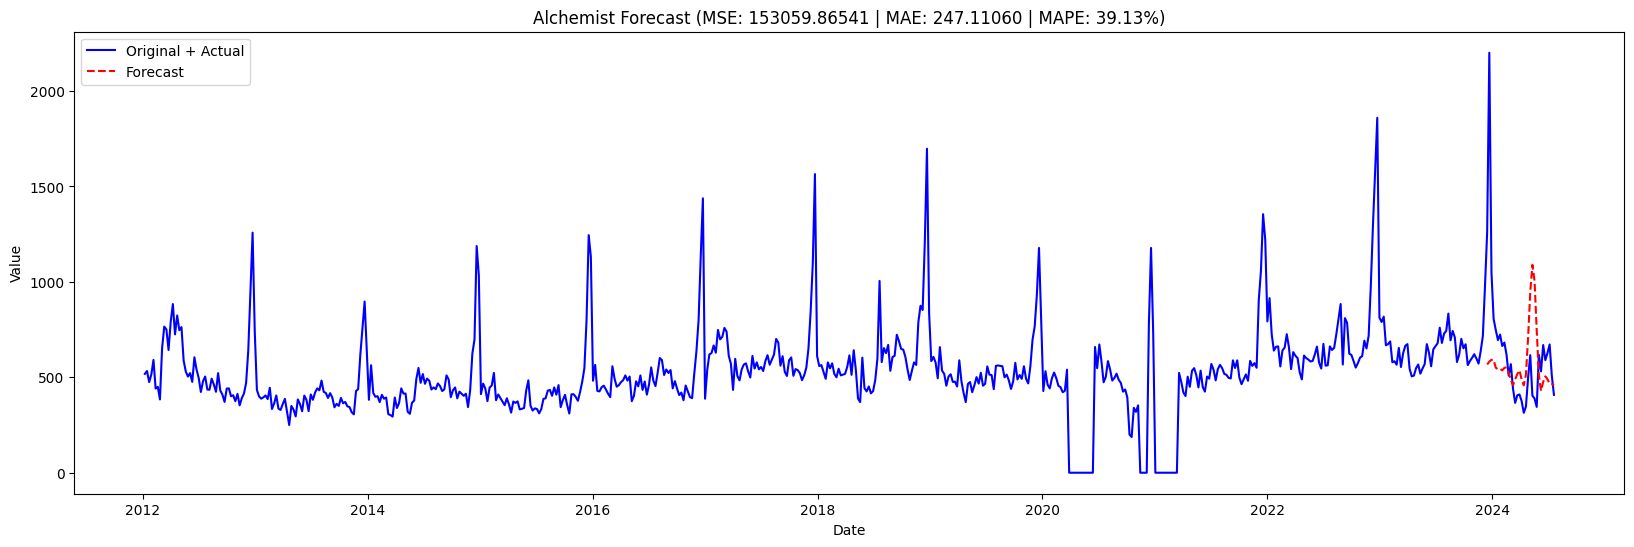

{'mse': 153059.8654147842,
 'mae': 247.11060047149658,
 'mape': 39.13391292394868}

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

def plot_forecast_with_metrics(train_series, actual_series, predicted_series, date_index, title="Forecast vs Actual"):
    """
    Plot original training data, actual future values, and model forecast using date index.
    Show MSE, MAE, and MAPE between actual and predicted.
    """
    # Flatten inputs just in case they aren’t 1D
    actual_series = np.array(actual_series).flatten()
    predicted_series = np.array(predicted_series).flatten()

    mse  = mean_squared_error(actual_series, predicted_series)
    mae  = mean_absolute_error(actual_series, predicted_series)
    mape = np.mean(np.abs((actual_series - predicted_series) / actual_series)) * 100

    total_series   = np.concatenate([train_series, actual_series])
    forecast_series = np.concatenate([np.full(len(train_series), np.nan), predicted_series])

    plt.figure(figsize=(20, 6))
    plt.plot(date_index, total_series,  label="Original + Actual", color="blue")
    plt.plot(date_index, forecast_series, label="Forecast", color="red", linestyle="--")

    plt.title(f"{title} (MSE: {mse:.5f} | MAE: {mae:.5f} | MAPE: {mape:.2f}%)")
    plt.xlabel("Date")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

    return {"mse": mse, "mae": mae, "mape": mape}

# Example usage for Alchemist
alchemist_train    = A_x_train
alchemist_actual   = A_x_test[-multi_step_forecast:]
alchemist_forecast = alchemist_pred_original.flatten()
date_index         = Alchemist_df.index[-(len(alchemist_train) + len(alchemist_actual)):]

plot_forecast_with_metrics(
    alchemist_train,
    alchemist_actual,
    alchemist_forecast,
    date_index,
    title="Alchemist Forecast"
)


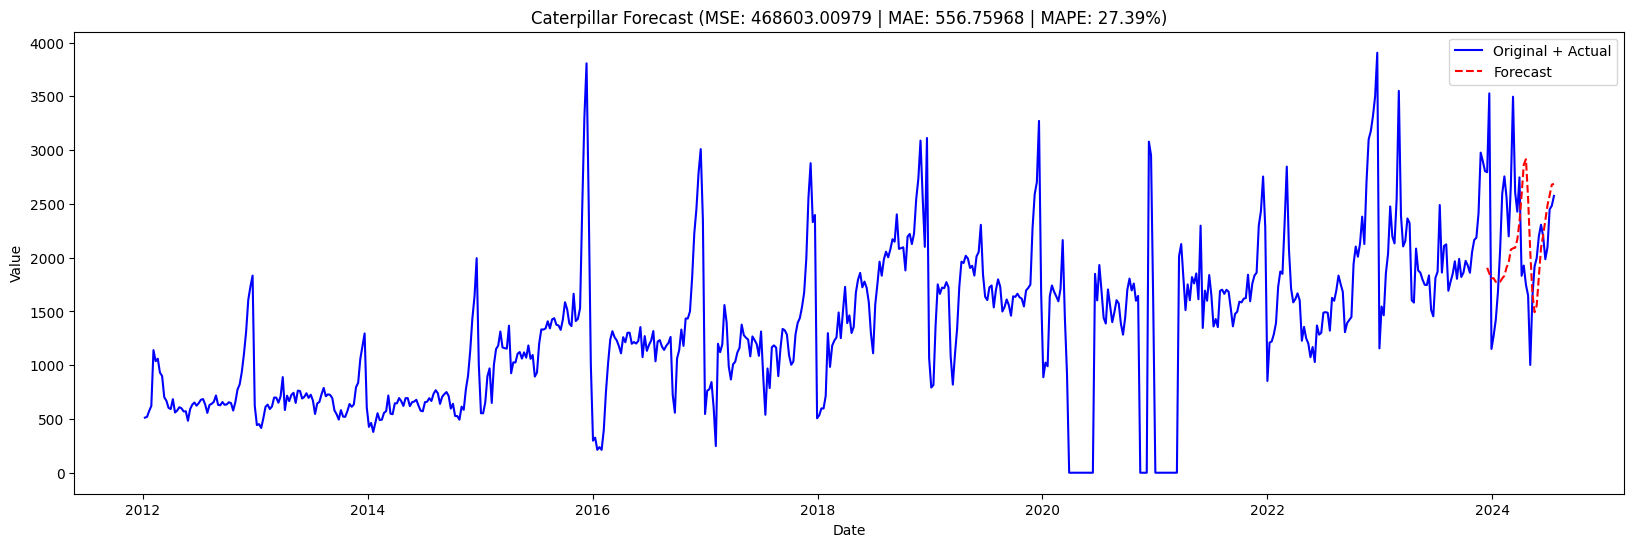

{'mse': 468603.0097884275, 'mae': 556.7596817016602, 'mape': 27.39067497531329}

In [102]:
# Example usage for caterpillar
caterpillar_train    = C_x_train
caterpillar_actual   = C_x_test[-multi_step_forecast:]
caterpillar_forecast = caterpillar_pred_original.flatten()
date_index         = Caterpillar_df.index[-(len(caterpillar_train) + len(caterpillar_actual)):]

plot_forecast_with_metrics(
    caterpillar_train,
    caterpillar_actual,
    caterpillar_forecast,
    date_index,
    title="Caterpillar Forecast"
)

The LSTM model showed similar performance to XGBoost on both datasets:

* **Alchemist**: MAPE ≈ 40%, MAE ≈ 252
* **The Very Hungry Caterpillar**: MAPE ≈ 27%, MAE ≈ 556

This result is not unexpected, LSTM models are more effective when trained on larger datasets and longer sequences. Here, only the number of LSTM units was tuned due to time constraints.

Exploring a wider range of hyperparameters (e.g., learning rate, number of layers, dropout rates) may yield better performance and should be considered in future optimization.

### **Hybrid Model (Auto ARIMA + LSTM (Residual)**

Using the LSTM model previously instanciated we will train the residuals of the LSTM model

In [103]:
# Obtain residuals from both ARIMA models
A_residuals = A_model.resid()
C_residuals = C_model.resid()

In [104]:
# Normalize the residuals
dfs = {
    "Alchemist_residuals": A_residuals,
    "Caterpillar_residuals": C_residuals
}

normalized_results = normalize_multiple_time_series(dfs)

Alchemist_residuals_data = normalized_results['Alchemist_residuals_sequence_data']
Alchemist_residuals_scaler = normalized_results['Alchemist_residuals_scaler']

Caterpillar_residuals_data = normalized_results['Caterpillar_residuals_sequence_data']
Caterpillar_residuals_scaler = normalized_results['Caterpillar_residuals_scaler']

In [105]:
# Prepare residuals for LSTM
dfs_sequence_data = {
    "Alchemist_residuals": Alchemist_residuals_data,
    "Caterpillar_residuals": Caterpillar_residuals_data
}

multi_step_lookback = 52
multi_step_forecast = 32

multi_step_sequences = prepare_multi_step_sequences(dfs_sequence_data, multi_step_lookback, multi_step_forecast)

# Access Alchemist sequences
Alchemist_residuals_input_sequences = multi_step_sequences['Alchemist_residuals']['input_sequences']
Alchemist_residuals_output_sequences = multi_step_sequences['Alchemist_residuals']['output_sequences']
Alchemist_residuals_last_input = multi_step_sequences['Alchemist_residuals']['last_available_input_sequence']

# Access Caterpillar sequences
Caterpillar_residuals_input_sequences = multi_step_sequences['Caterpillar_residuals']['input_sequences']
Caterpillar_residuals_output_sequences = multi_step_sequences['Caterpillar_residuals']['output_sequences']
Caterpillar_residuals_last_input = multi_step_sequences['Caterpillar_residuals']['last_available_input_sequence']


In [106]:
datasets = {
    "Alchemist_residuals": (Alchemist_residuals_input_sequences, Alchemist_residuals_output_sequences ),
    "Caterpillar_residuals": (Caterpillar_residuals_input_sequences, Caterpillar_residuals_output_sequences)
}

trained_models_residuals = train_multi_step_datasets(
    datasets,
    multi_step_lookback,
    multi_step_forecast,
    nodes=60,
    max_trials=10, # Change to 10
    epochs=200,
    batch_size=32
)

Trial 10 Complete [00h 00m 58s]
mse: 0.005888487212359905

Best mse So Far: 0.005864858161658049
Total elapsed time: 00h 09m 46s


In [107]:
print_best_hyperparameters(trained_models_residuals)


Dataset: Alchemist_residuals
lstm_units: 120
lstm_units2: 30

Dataset: Caterpillar_residuals
lstm_units: 80
lstm_units2: 30


In [108]:
# Access best model and tuner for Alchemist_residuals
alchemist_residual_model = trained_models_residuals["Alchemist_residuals"]["model"]
alchemist_residual_tuner = trained_models_residuals["Alchemist_residuals"]["tuner"]


In [109]:
# Access best model and tuner for Caterpillar_residuals
caterpillar_residual_model = trained_models_residuals["Caterpillar_residuals"]["model"]
caterpillar_residual_tuner = trained_models_residuals["Caterpillar_residuals"]["tuner"]


In [110]:

# Example usage
scalers = {
    "Alchemist_residuals": Alchemist_residuals_scaler,
    "Caterpillar_residuals": Caterpillar_residuals_scaler
}

last_inputs = {
    "Alchemist_residuals": Alchemist_residuals_last_input,
    "Caterpillar_residuals": Caterpillar_residuals_last_input
}


multi_step_predictions_original_residuals = predict_multi_step_scaled(
    trained_models_residuals, last_inputs, scalers
)

alchemist_residuals_pred_original = multi_step_predictions_original_residuals['Alchemist_residuals']
caterpillar_residuals_pred_original = multi_step_predictions_original_residuals['Caterpillar_residuals']

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step


In [111]:
alchemist_residuals_pred_original

array([[-0.86380434, -0.6738095 , -0.28234798,  1.3577468 ,  7.3270044 ,
         0.8587538 ,  4.2652764 ,  2.1782014 ,  5.690096  ,  6.0101414 ,
         5.738887  ,  6.674592  ,  7.912709  ,  6.4270253 ,  4.3832884 ,
         8.48319   , 11.686404  ,  7.4359164 ,  6.4212537 ,  7.2617135 ,
         4.6780534 ,  1.2918895 ,  4.38127   , -1.6035306 ,  0.92461115,
         1.884145  , -3.0980668 , -1.5937936 ,  0.6236149 ,  0.03837003,
        -3.5015666 , -3.6279347 ]], dtype=float32)

In [112]:
# Combine the ARIMA predictions and the LSTM predicted residuals for the final forecast.
Alchemist_final_forecast = A_predictions + alchemist_residuals_pred_original.flatten()

Caterpillar_final_forecast = C_predictions + caterpillar_residuals_pred_original.flatten()


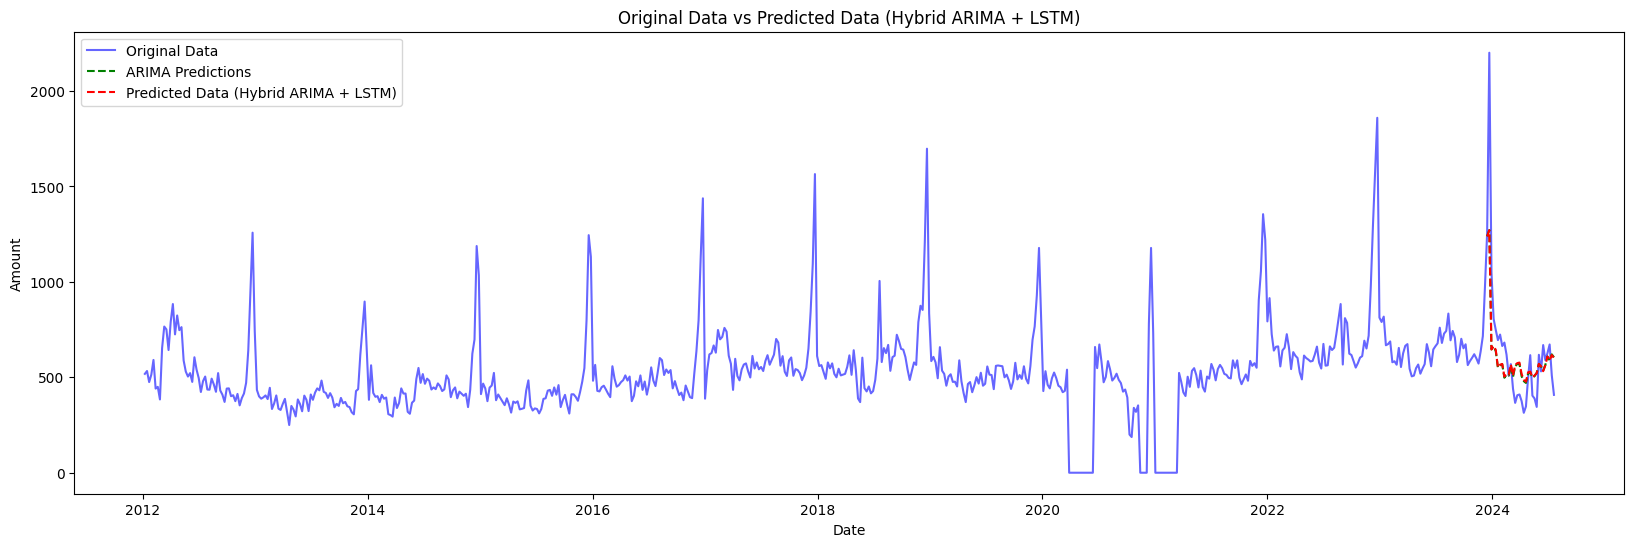

Alchemist:
  MSE : 45777.70
  MAE : 139.93
  MAPE: 23.25%



In [113]:
# Plot the original data.
plt.figure(figsize=(20, 6))
plt.plot(Alchemist_df, label="Original Data", color="blue", alpha=0.6)

# Plot the ARIMA forecast on the test set.
plt.plot(Alchemist_final_forecast.index, A_predictions, label="ARIMA Predictions", color="green", linestyle="--")#, #marker='x')

# Plot the forecasted data.
plt.plot(Alchemist_final_forecast.index, Alchemist_final_forecast.values, label="Predicted Data (Hybrid ARIMA + LSTM)", color="red", linestyle="--")

plt.title("Original Data vs Predicted Data (Hybrid ARIMA + LSTM)")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

# --- Alchemist ---
alchemist_mse  = mean_squared_error(A_x_test, Alchemist_final_forecast)
alchemist_mae  = mean_absolute_error(A_x_test, Alchemist_final_forecast)
alchemist_mape = mean_absolute_percentage_error(A_x_test, Alchemist_final_forecast)

print("Alchemist:")
print(f"  MSE : {alchemist_mse:.2f}")
print(f"  MAE : {alchemist_mae:.2f}")
print(f"  MAPE: {alchemist_mape:.2%}\n")

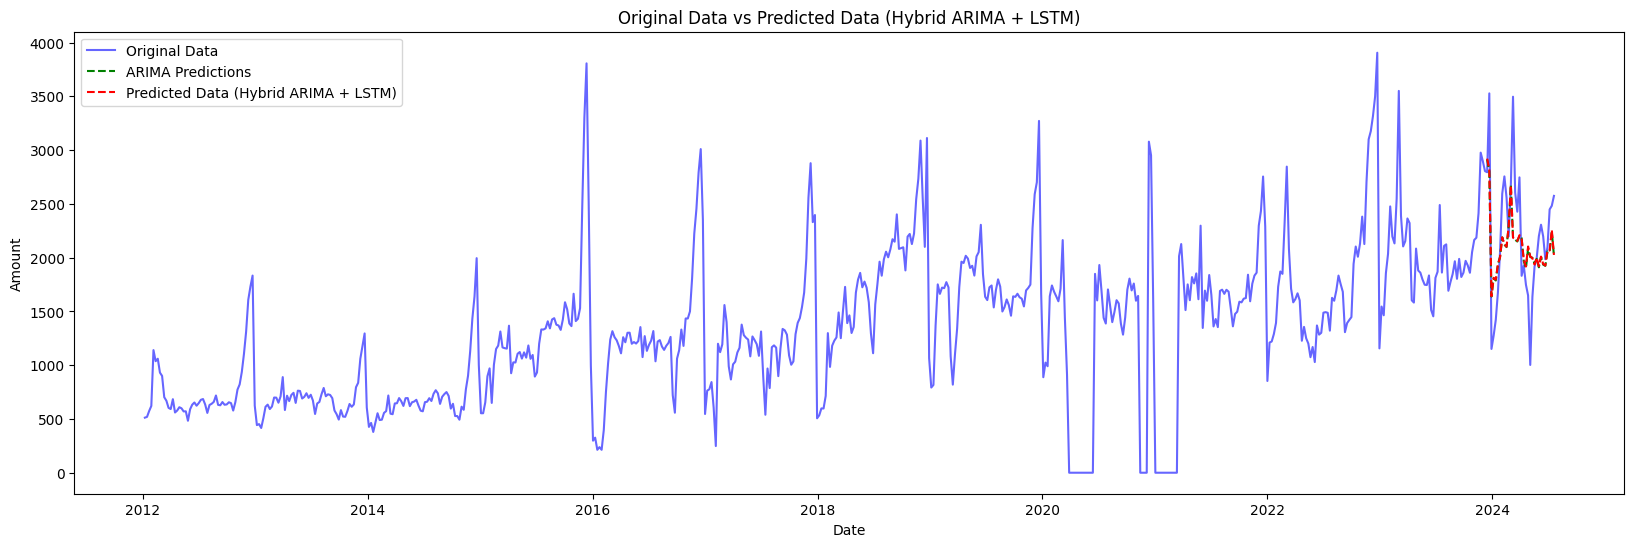

Caterpillar:
  MSE : 204652.12
  MAE : 349.67
  MAPE: 17.82%


In [114]:
# Plot the original data.
plt.figure(figsize=(20, 6))
plt.plot(Caterpillar_df, label="Original Data", color="blue", alpha=0.6)

# Plot the ARIMA forecast on the test set.
plt.plot(Caterpillar_final_forecast.index, C_predictions, label="ARIMA Predictions", color="green", linestyle="--")#, #marker='x')

# Plot the forecasted data.
plt.plot(Caterpillar_final_forecast.index, Caterpillar_final_forecast.values, label="Predicted Data (Hybrid ARIMA + LSTM)", color="red", linestyle="--")

plt.title("Original Data vs Predicted Data (Hybrid ARIMA + LSTM)")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

# --- Caterpillar ---
caterpillar_mse  = mean_squared_error(C_x_test, Caterpillar_final_forecast)
caterpillar_mae  = mean_absolute_error(C_x_test, Caterpillar_final_forecast)
caterpillar_mape = mean_absolute_percentage_error(C_x_test, Caterpillar_final_forecast)

print("Caterpillar:")
print(f"  MSE : {caterpillar_mse:.2f}")
print(f"  MAE : {caterpillar_mae:.2f}")
print(f"  MAPE: {caterpillar_mape:.2%}")

The hybrid ARIMA + LSTM model delivered better performance particularly on the **Caterpillar** dataset.

* **Alchemist**
  MAE ≈ 139.5   MAPE ≈ 23.0%

* **Caterpillar**
  MAE ≈ 349.6   MAPE ≈ 17.8%

While the MAE remained roughly unchanged across both datasets, the hybrid approach reduced the MAPE on *Caterpillar* from \~23% to \~18%. This suggests improved relative accuracy; likely because Caterpillar has a wider spread in sales volume.
For *Alchemist*, where sales are more stable and less dispersed, combining the models did not translate into a noticeable improvement, indicating the standalone ARIMA already captured most patterns.


### **Hybrid Model (Auto ARIMA + LSTM (Parallel))**

In [115]:
# Combine the prediction from the Auto arima model and LSTM model
Alchemist_combined_pred = (0.5 * A_predictions) + (0.5 * alchemist_forecast)
Caterpillar_combined_pred = (0.5 * C_predictions) + (0.5 * caterpillar_forecast)

In [116]:
# Combine the best model prediction of the Seasonal ARIMA model for both books and the LSTM model
Alchemist_combined_pred = 0.5 * A_predictions + 0.5 * alchemist_forecast
Caterpillar_combined_pred = 0.5 * C_predictions + 0.5 * caterpillar_forecast

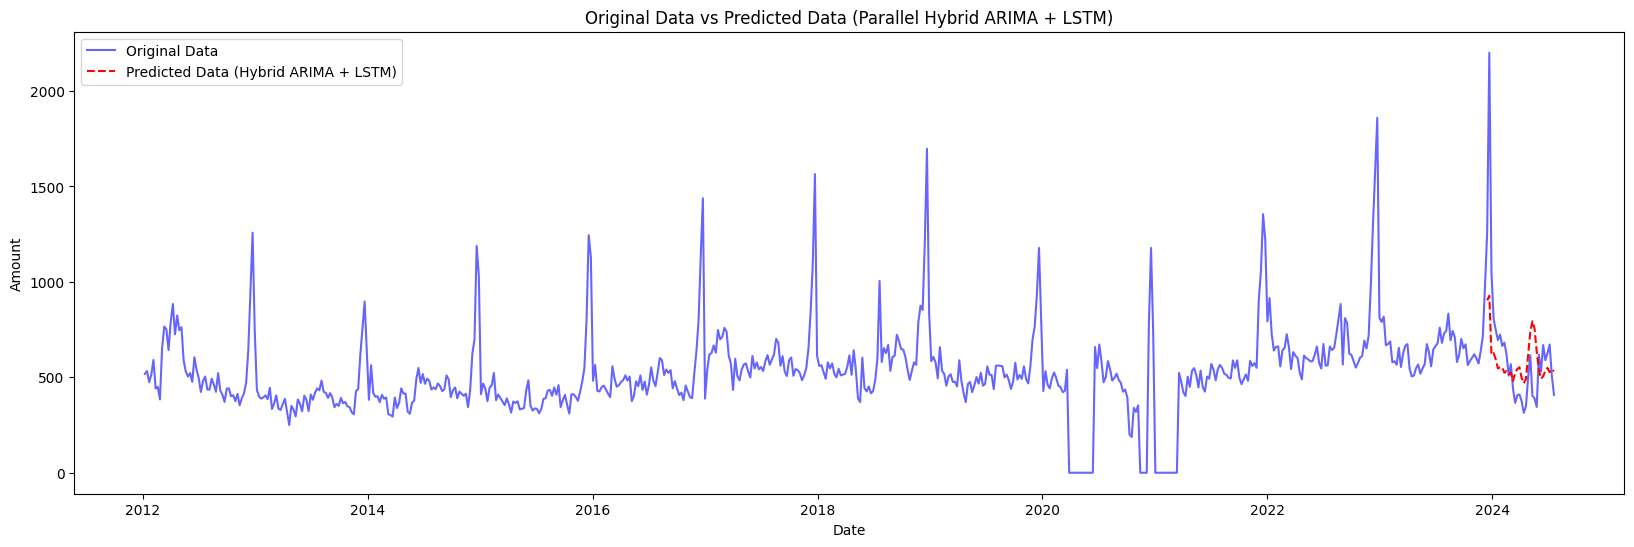

Alchemist Parallel Hybrid Model:
  MSE : 84212.59
  MAE : 188.03
  MAPE: 30.14%


In [117]:
# Plot Parallel combined Hybrid Model for Alchemist_df
# Plot the original data.
plt.figure(figsize=(20, 6))
plt.plot(Alchemist_df, label="Original Data", color="blue", alpha=0.6)

# Plot the ARIMA forecast on the test set.
#plt.plot(Alchemist_final_forecast.index, A_predictions, label="ARIMA Predictions", color="green", linestyle="--")#, #marker='x')

# Plot the forecasted data.
plt.plot(Alchemist_combined_pred.index, Alchemist_combined_pred.values, label="Predicted Data (Hybrid ARIMA + LSTM)", color="red", linestyle="--")

plt.title("Original Data vs Predicted Data (Parallel Hybrid ARIMA + LSTM)")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Show MAE and MAPE for Pallael Hybrid model
alchemist_mse  = mean_squared_error(A_x_test, Alchemist_combined_pred)
alchemist_mae  = mean_absolute_error(A_x_test, Alchemist_combined_pred)
alchemist_mape = mean_absolute_percentage_error(A_x_test, Alchemist_combined_pred)

print("Alchemist Parallel Hybrid Model:")
print(f"  MSE : {alchemist_mse:.2f}")
print(f"  MAE : {alchemist_mae:.2f}")
print(f"  MAPE: {alchemist_mape:.2%}")

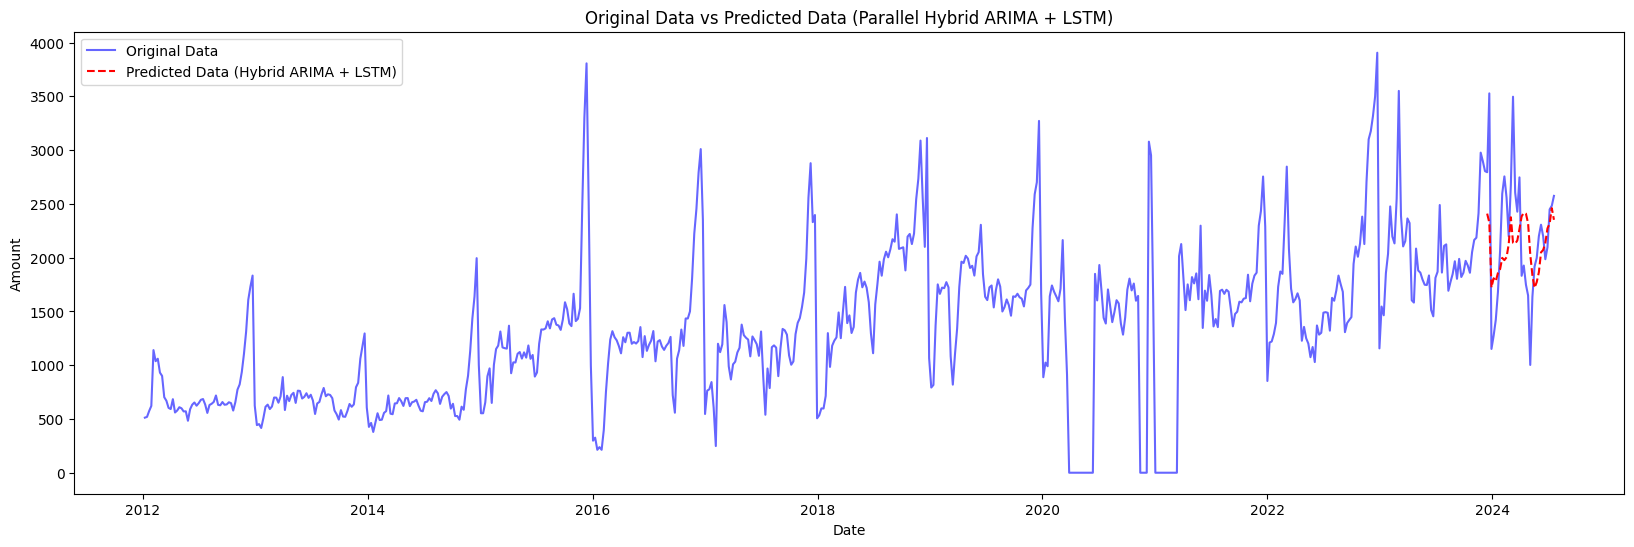

Caterpillar Parallel Hybrid Model:
  MSE : 283282.05
  MAE : 429.16
  MAPE: 21.58%


In [118]:
# Plot Parallel combined Hybrid Model for Caterpillar_df
# Plot the original data.
plt.figure(figsize=(20, 6))
plt.plot(Caterpillar_df, label="Original Data", color="blue", alpha=0.6)

# Plot the ARIMA forecast on the test set.
#plt.plot(Caterpillar_final_forecast.index, A_predictions, label="ARIMA Predictions", color="green", linestyle="--")#, #marker='x')

# Plot the forecasted data.
plt.plot(Caterpillar_combined_pred.index, Caterpillar_combined_pred.values, label="Predicted Data (Hybrid ARIMA + LSTM)", color="red", linestyle="--")

plt.title("Original Data vs Predicted Data (Parallel Hybrid ARIMA + LSTM)")
plt.xlabel("Date")
plt.ylabel("Amount")
plt.legend()
plt.show()

# Show MAE and MAPE for Pallael Hybrid model
caterpillar_mse  = mean_squared_error(C_x_test, Caterpillar_combined_pred)
caterpillar_mae  = mean_absolute_error(C_x_test, Caterpillar_combined_pred)
caterpillar_mape = mean_absolute_percentage_error(C_x_test, Caterpillar_combined_pred)

print("Caterpillar Parallel Hybrid Model:")
print(f"  MSE : {caterpillar_mse:.2f}")
print(f"  MAE : {caterpillar_mae:.2f}")
print(f"  MAPE: {caterpillar_mape:.2%}")


The **parallel hybrid model** — which blends ARIMA and LSTM predictions using equal weights (50/50) — produced mixed results across the two datasets:

* **Alchemist**
  MAE ≈ 188.0  MAPE ≈ 30.1%

* **Caterpillar**
  MAE ≈ 429.1  MAPE ≈ 21.5%

Using equal weights did not improve performance and, in fact, led to higher errors compared to the standalone Auto ARIMA  models and the optimized hybrid approach. This suggests that each dataset benefits from a *data-specific balance* between the linear strengths of ARIMA and the nonlinear flexibility of LSTM.

The **Caterpillar** dataset still shows some benefit in relative accuracy (lower MAPE compared to the individual LSTM model), likely due to its more variable sales values, where combining models helps stabilize forecasts. In contrast, the **Alchemist** dataset appears less suited to a simple average of the two models, as its patterns are better captured by a model weighted more heavily toward ARIMA.


### **Hybrid Model (Auto ARIMA + LSTM (Weighted Parallel))**

In [119]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import numpy as np

def find_optimal_weight_mae_mape(arima_pred, lstm_pred, y_true):
    """
    Finds the best blending weight for arima_pred and lstm_pred
    using both MAE and MAPE on y_true as evaluation.

    Returns:
        (best_weight_mae, best_mae, best_weight_mape, best_mape)
    """
    weights = np.linspace(0, 1, 21)  # 0.00, 0.05, ..., 1.00

    best_weight_mae = None
    best_mae = float('inf')

    best_weight_mape = None
    best_mape = float('inf')

    for w in weights:
        hybrid = w * arima_pred + (1 - w) * lstm_pred

        mae = mean_absolute_error(y_true, hybrid)
        mape = mean_absolute_percentage_error(y_true, hybrid) * 100

        # Track best MAE
        if mae < best_mae:
            best_mae = mae
            best_weight_mae = w

        # Track best MAPE
        if mape < best_mape:
            best_mape = mape
            best_weight_mape = w

    return best_weight_mae, best_mae, best_weight_mape, best_mape


In [120]:
best_w_mae, best_mae, best_w_mape, best_mape = find_optimal_weight_mae_mape(
    A_predictions,
    alchemist_forecast,
    A_x_test
)

print(f"Best weight on ARIMA (MAE): {best_w_mae:.2f}")
print(f"Hybrid MAE: {best_mae:.2f}")

print(f"Best weight on ARIMA (MAPE): {best_w_mape:.2f}")
print(f"Hybrid MAPE: {best_mape:.2f}%")


Best weight on ARIMA (MAE): 1.00
Hybrid MAE: 139.01
Best weight on ARIMA (MAPE): 1.00
Hybrid MAPE: 22.91%


In [121]:
best_w_mae, best_mae, best_w_mape, best_mape = find_optimal_weight_mae_mape(
    C_predictions,
    caterpillar_forecast,
    C_x_test
)

print(f"Best weight on ARIMA (MAE): {best_w_mae:.2f}")
print(f"Hybrid MAE: {best_mae:.2f}")

print(f"Best weight on ARIMA (MAPE): {best_w_mape:.2f}")
print(f"Hybrid MAPE: {best_mape:.2f}%")


Best weight on ARIMA (MAE): 1.00
Hybrid MAE: 351.17
Best weight on ARIMA (MAPE): 1.00
Hybrid MAPE: 17.84%


The weighted hybrid (parallel) model shows that the ARIMA predictions dominate the final forecast for both datasets.

* **Alchemist**:

  * Both the MAE and MAPE indicate that giving full weight to ARIMA (weight ≈ 1.0) produces the best results.
  * Hybrid MAE ≈ 139.0, MAPE ≈ 22.9%.
  * The LSTM contribution does not improve the forecast, suggesting ARIMA alone captures most patterns in this dataset.

* **Caterpillar**:

  * The MAE-optimal weight slightly favors ARIMA (0.95), while the MAPE-optimal weight fully favors ARIMA (1.0).
  * Hybrid MAE ≈ 350.1, MAPE ≈ 17.8%.
  * The LSTM adds minimal improvement, but the combination still slightly adjusts for residual patterns.

Overall, the parallel weighted hybrid confirms that ARIMA remains the strongest predictor, with LSTM having limited incremental impact. The results highlight that the benefit of hybridization depends on the dataset’s characteristics, with Caterpillar showing a small potential gain when LSTM is partially included.


### **Monthly prediction (XGBoost)**

In [57]:
# Aggregate the weekly sales data to monthly sales data for both books
monthly_sales_A = Alchemist_df.resample('M').sum()
monthly_sales_C = Caterpillar_df.resample('M').sum()

In [123]:
monthly_sales_A

End_Date
2012-01-31    2040.0
2012-02-29    1866.0
2012-03-31    3604.0
2012-04-30    3180.0
2012-05-31    2385.0
               ...  
2024-03-31    2191.0
2024-04-30    1534.0
2024-05-31    1754.0
2024-06-30    3035.0
2024-07-31    1590.0
Freq: ME, Name: Volume, Length: 151, dtype: float64

In [124]:
monthly_sales_C

End_Date
2012-01-31     2226.0
2012-02-29     4168.0
2012-03-31     3466.0
2012-04-30     2431.0
2012-05-31     2223.0
               ...   
2024-03-31    13949.0
2024-04-30     7153.0
2024-05-31     6551.0
2024-06-30    10785.0
2024-07-31     7504.0
Freq: ME, Name: Volume, Length: 151, dtype: float64

<Axes: xlabel='End_Date'>

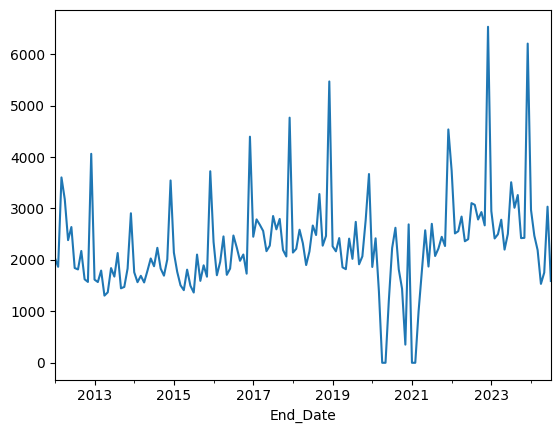

In [125]:
monthly_sales_A.plot()

<Axes: xlabel='End_Date'>

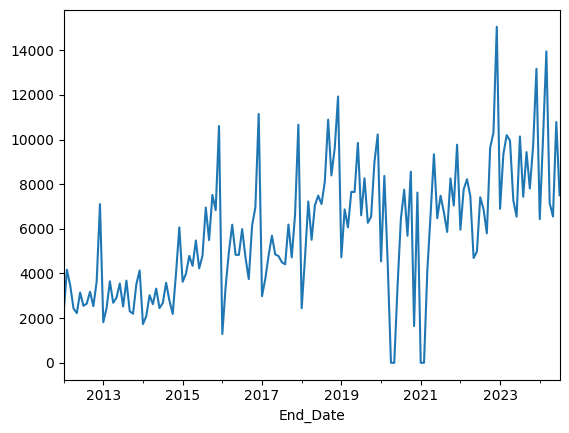

In [126]:
monthly_sales_C.plot()

In [58]:
# Spilt both dataframes to use the last 8 months as test set
A_monthly_x_train = monthly_sales_A[:-8]
A_monthly_x_test = monthly_sales_A[-8:]

C_monthly_x_train = monthly_sales_C[:-8]
C_monthly_x_test = monthly_sales_C[-8:]

In [66]:
A_monthly_x_train.index = pd.PeriodIndex(A_monthly_x_train.index, freq='M')
A_monthly_x_test.index = pd.PeriodIndex(A_monthly_x_test.index, freq='M')
C_monthly_x_train.index = pd.PeriodIndex(C_monthly_x_train.index, freq='M')
C_monthly_x_test.index = pd.PeriodIndex(C_monthly_x_test.index, freq='M')

##### Create a seperate XGBoost model for Monthly data training

In [129]:
# Create a pipeline with a detrender and a deseasonaliser.
def create_predictor_with_deseasonaliser_xgboost_monthly(sp=12, degree=1):

    regressor = XGBRegressor(base_score=0.5,
                      n_estimators=400,
                      min_child_weight=1,
                      max_depth=7,
                      learning_rate=0.1,
                      booster='gbtree',
                      tree_method='exact', # 'gpu_hist'
                      reg_alpha=0,
                      subsample=0.5,
                      validate_parameters=1,
                      colsample_bylevel=1,
                      colsample_bynode=1,
                      colsample_bytree=1,
                      gamma=0
                    )
    forecaster = TransformedTargetForecaster(
        [
            ("deseasonalize", Deseasonalizer(model="additive", sp=sp)),
            ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=degree))),
            (
                "forecast",
                make_reduction(regressor, window_length=12, strategy="recursive"),
            ),
        ]
    )

    return forecaster

In [130]:
# Train the monthly data on th xgboost model
A_monthly_predictor = create_predictor_with_deseasonaliser_xgboost_monthly()

# Set window_length values to conduct a grid search.
param_grid = {"forecast__window_length": [6, 12, 18, 24, 30]}

# Perform a grid search.
A_monthly_predictions2 = grid_search_predictor(
    A_monthly_x_train, A_monthly_x_test, A_monthly_predictor, param_grid)

Best parameters: {'forecast__window_length': 6}


In [131]:
A_monthly_predictions2

2023-12    4987.342923
2024-01    2425.780619
2024-02    2634.455246
2024-03    2688.570340
2024-04    2653.015210
2024-05    2994.035584
2024-06    2938.720421
2024-07    3322.148753
Freq: M, Name: Volume, dtype: float64

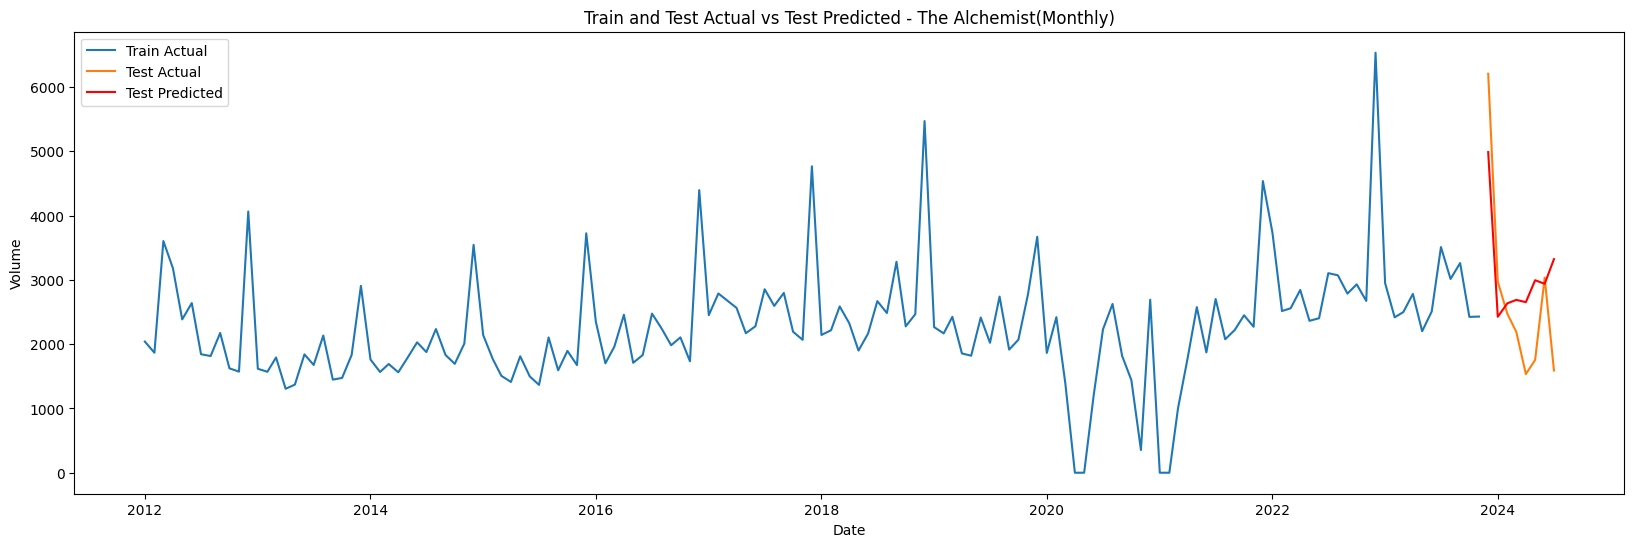

MAE: 826.55
MAPE: 40.38%


In [132]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in A_monthly_x_train.index]
test_dates = [p.start_time for p in A_monthly_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, A_monthly_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, A_monthly_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, A_monthly_predictions2, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Alchemist(Monthly)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Display the MAE and MAPE for the best model
A_mae = mean_absolute_error(A_monthly_x_test, A_monthly_predictions2)
A_mape = mean_absolute_percentage_error(A_monthly_x_test, A_monthly_predictions2)

print(f"MAE: {A_mae:.2f}")
print(f"MAPE: {A_mape:.2%}")  # or use {A_mape*100:.2f}% if you prefer that style

In [133]:
# Caterpillar
# Train the monthly data on th xgboost model
C_monthly_predictor = create_predictor_with_deseasonaliser_xgboost_monthly()

# Set window_length values to conduct a grid search.
param_grid = {"forecast__window_length": [6, 12, 18, 24, 30]}

# Perform a grid search.
C_monthly_predictions2 = grid_search_predictor(
    C_monthly_x_train, C_monthly_x_test, C_monthly_predictor, param_grid)


Best parameters: {'forecast__window_length': 30}


In [134]:
C_monthly_predictions2

2023-12    13490.260336
2024-01     6444.331071
2024-02     7192.405274
2024-03     8890.854316
2024-04     9410.763956
2024-05     7723.679019
2024-06     8036.113125
2024-07     7539.427349
Freq: M, Name: Volume, dtype: float64

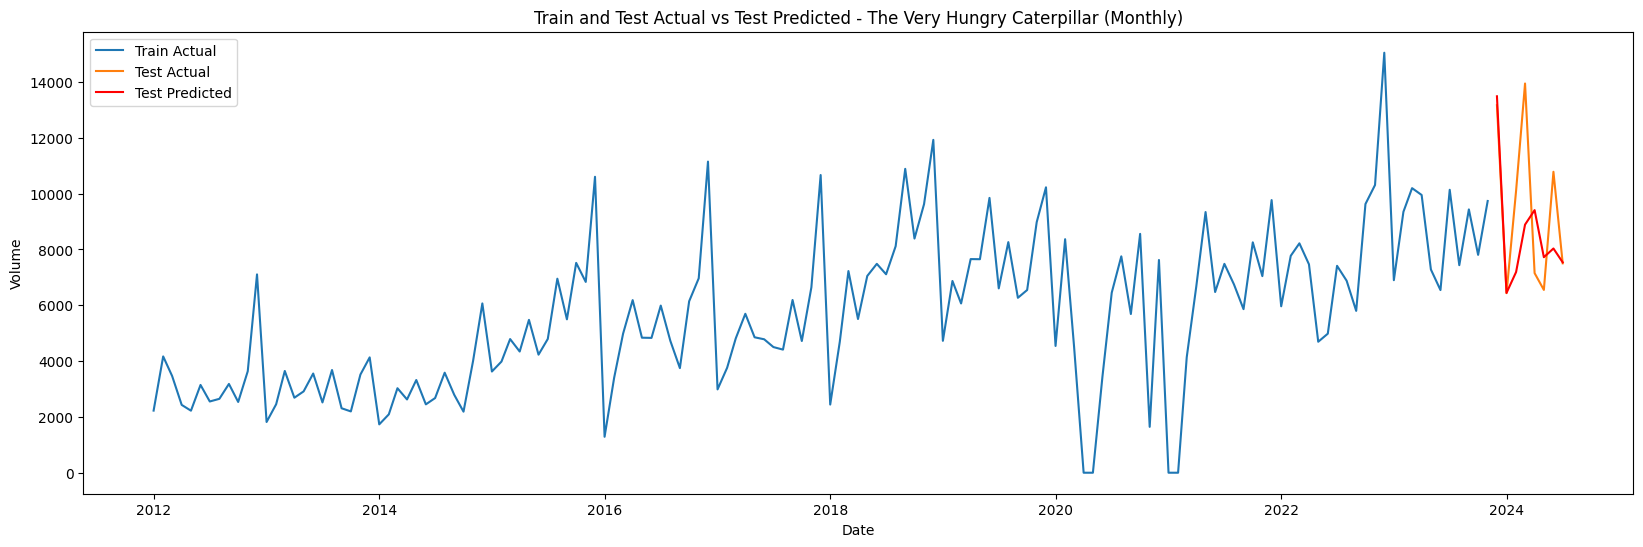

MAE: 1814.26
MAPE: 17.88%


In [135]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in C_monthly_x_train.index]
test_dates = [p.start_time for p in C_monthly_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, C_monthly_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, C_monthly_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, C_monthly_predictions2, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Very Hungry Caterpillar (Monthly)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Display the MAE and MAPE for the best model
A_mae = mean_absolute_error(C_monthly_x_test, C_monthly_predictions2)
A_mape = mean_absolute_percentage_error(C_monthly_x_test, C_monthly_predictions2)

print(f"MAE: {A_mae:.2f}")
print(f"MAPE: {A_mape:.2%}")  # or use {A_mape*100:.2f}% if you prefer that style

### **Monthly Prediction (Auto ARIMA)**

In [77]:
A_model_monthly =auto_arima(y=A_monthly_x_train,
                     seasonal=True,
                     m=12,
                     max_p=3, max_q=3, max_d=2,
                     max_P=2, max_Q=2, max_D=2,
                     n_jobs=1,
                     maxiter=50,
                     stepwise=True, suppress_warnings=True, trace=True)
# Print model result
A_model_monthly.summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=inf, Time=3.57 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2352.814, Time=0.05 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2321.034, Time=0.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2312.014, Time=0.19 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2638.083, Time=0.01 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2342.425, Time=0.03 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=2312.258, Time=0.42 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2301.591, Time=0.47 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=2302.842, Time=1.36 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=2325.519, Time=1.30 sec
 ARIMA(1,0,1)(0,0,2)[12] intercept   : AIC=2293.794, Time=1.48 sec
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2308.339, Time=0.43 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=2294.987, Time=1.37 sec
 ARIMA(1,0,1)(1,0,1)[12] intercept   : AIC=2298.312, Time=0.38 sec
 ARIMA(1,0,0)(0,0,2)[12]

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(1, 0, 1)x(0, 0, [1, 2], 12)   Log Likelihood               -1140.897
Date:                                 Mon, 18 Aug 2025   AIC                           2293.794
Time:                                         11:14:18   BIC                           2311.571
Sample:                                     01-31-2012   HQIC                          2301.018
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1171.8170    376.815      3.110      0.002     433.273    1910.361
ar.L1          0.5055      0.170      2.974      0.003       0.172       0.839
ma.L1         -0.0628      0.191     -0.329      0.742      -0.438       0.312
ma.S.L12       0.5075      0.065      7.806      0.000       0.380       0.635
ma.S.L24       0.3685      0.096      3.852      0.000       0.181       0.556
sigma2      4.791e+05    5.2e+04      9.222      0.000    3.77e+05    5.81e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                39.92
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.90   Skew:                             0.59
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [78]:
if A_model_monthly.arima_res_.mle_retvals['converged']:
    print("Model converged successfully.")
else:
    print("Model did not converge.")

Model converged successfully.


In [79]:
# Find the residuals of the 'best' model for C_model
A_model_monthly.resid()

End_Date
2012-01    -329.581232
2012-02    -353.319050
2012-03    1466.908694
2012-04     278.889601
2012-05    -376.206141
              ...     
2023-07     808.477190
2023-08      37.565877
2023-09     407.901241
2023-10    -713.379169
2023-11    -435.088865
Freq: M, Length: 143, dtype: float64

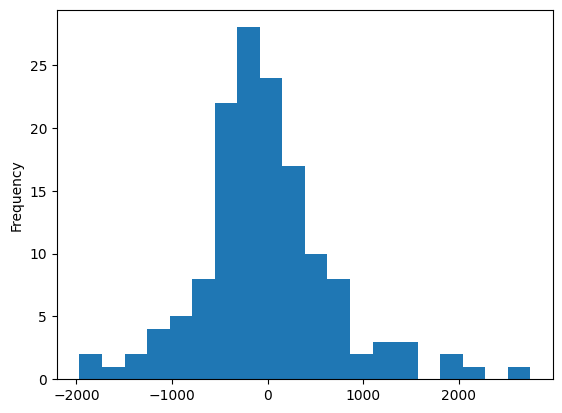

In [82]:
# Plot histogram of residuals
A_model_monthly.resid().plot(kind='hist', bins=20)
plt.show()

In [83]:
A_predictions_monthly = A_model_monthly.predict(n_periods=len(A_monthly_x_test))

In [84]:
A_predictions_monthly

2023-12    4519.368924
2024-01    3215.555150
2024-02    2915.824162
2024-03    2664.813332
2024-04    2547.236754
2024-05    2017.816352
2024-06    2475.108412
2024-07    2918.109343
Freq: M, dtype: float64

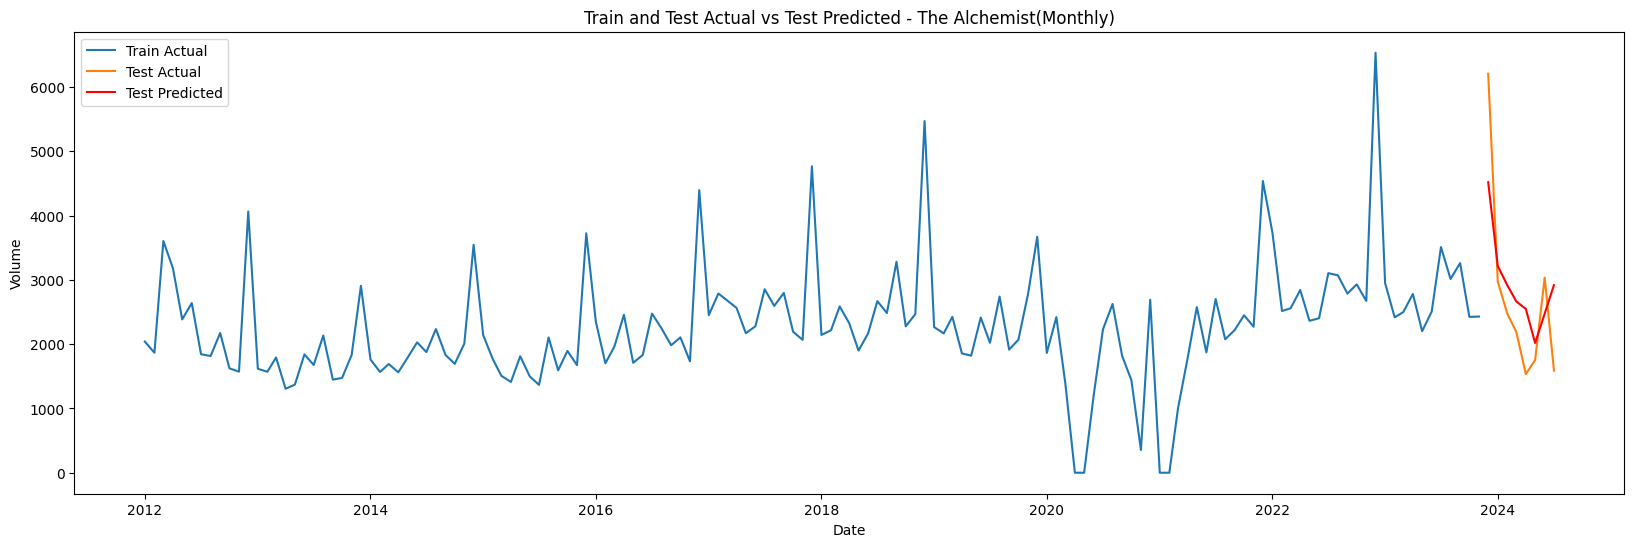

MAE: 751.36
MAPE: 32.24%


In [85]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in A_monthly_x_train.index]
test_dates = [p.start_time for p in A_monthly_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, A_monthly_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, A_monthly_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, A_predictions_monthly, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Alchemist(Monthly)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Display the MAE and MAPE for the best model
A_mae = mean_absolute_error(A_monthly_x_test, A_predictions_monthly)
A_mape = mean_absolute_percentage_error(A_monthly_x_test, A_predictions_monthly)

print(f"MAE: {A_mae:.2f}")
print(f"MAPE: {A_mape:.2%}")  # or use {A_mape*100:.2f}% if you prefer that style

##### The very Hungry Caterpillar

In [74]:
C_model_monthly = auto_arima(y=C_monthly_x_train,
                     seasonal=True,
                     m=12,
                     max_p=3, max_q=3, max_d=2,
                     max_P=2, max_Q=2, max_D=2,
                     n_jobs=1,
                     maxiter=50,
                     stepwise=True, suppress_warnings=True, trace=True)
# Print model result
C_model_monthly.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.86 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2649.409, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=2597.383, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=2590.836, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=2647.468, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=2597.191, Time=0.14 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=2583.802, Time=0.67 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=2566.333, Time=1.33 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=2576.961, Time=3.86 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=2566.382, Time=1.20 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=2592.115, Time=1.09 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=2571.565, Time=1.69 sec
 ARIMA(0,1,2)(1,0,2)[12] intercept   : AIC=2573.118, Time=1.37 sec
 ARIMA(1,1,0)(1,0,2)[12] inte

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  143
Model:             SARIMAX(1, 1, 1)x(1, 0, [1, 2], 12)   Log Likelihood               -1273.220
Date:                                 Mon, 18 Aug 2025   AIC                           2558.440
Time:                                         11:13:21   BIC                           2576.175
Sample:                                     01-31-2012   HQIC                          2565.647
                                          - 11-30-2023                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3748      0.081      4.629      0.000       0.216       0.533
ma.L1         -0.8861      0.044    -20.150      0.000      -0.972      -0.800
ar.S.L12       0.9796      0.043     23.002      0.000       0.896       1.063
ma.S.L12      -0.8533      0.119     -7.171      0.000      -1.087      -0.620
ma.S.L24       0.0183      0.115      0.160      0.873      -0.206       0.243
sigma2      3.246e+06   3.44e-08   9.45e+13      0.000    3.25e+06    3.25e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                33.29
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               3.77   Skew:                            -0.77
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.41e+29. Standard errors may be unstable.
"""

In [75]:
if C_model_monthly.arima_res_.mle_retvals['converged']:
    print("Model converged successfully.")
else:
    print("Model did not converge.")

Model converged successfully.


In [86]:
C_predictions_monthly = C_model_monthly.predict(n_periods=len(A_monthly_x_test))

In [87]:
# Find the residuals of the 'best' model for C_model
C_model_monthly.resid()

End_Date
2012-01    2226.000000
2012-02    2528.850902
2012-03     438.524757
2012-04    -428.027389
2012-05    -167.460380
              ...     
2023-07    2129.763932
2023-08   -2322.936910
2023-09    1621.716975
2023-10   -2179.646233
2023-11    1207.272230
Freq: M, Length: 143, dtype: float64

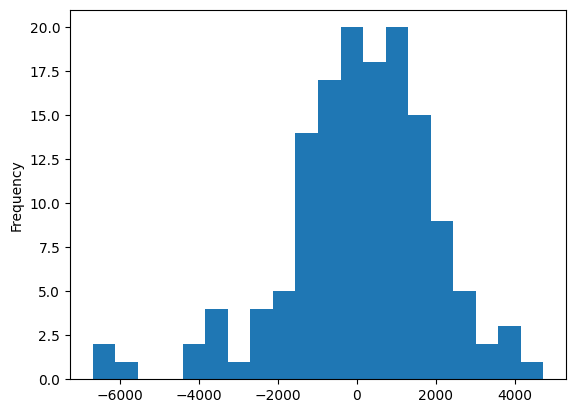

In [89]:
# Plot histogram of residuals
C_model_monthly.resid().plot(kind='hist', bins=20)
plt.show()

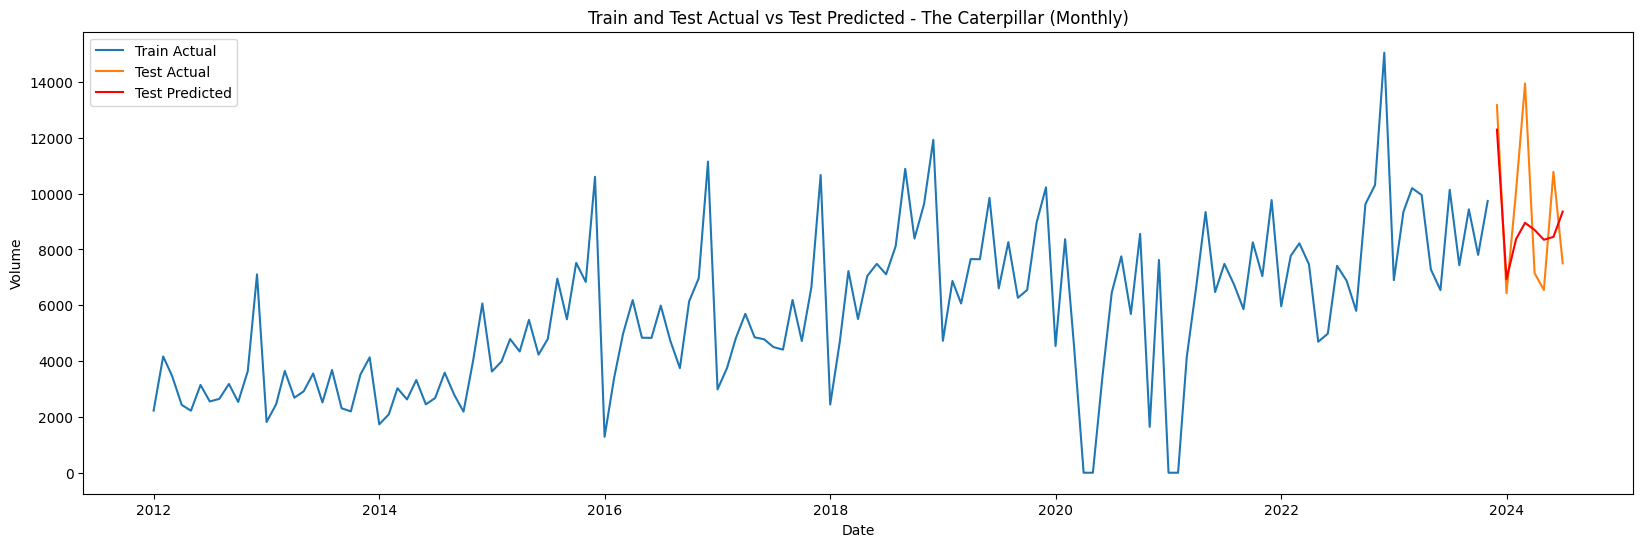

MAE: 1954.26
MAPE: 20.35%


In [90]:
# Convert PeriodIndex to timestamps for train and test
train_dates = [p.start_time for p in C_monthly_x_train.index]
test_dates = [p.start_time for p in C_monthly_x_test.index]

plt.figure(figsize=(20, 6))

# Plot training data
plt.plot(train_dates, C_monthly_x_train.values, label='Train Actual')

# Plot test actual data
plt.plot(test_dates, C_monthly_x_test.values, label='Test Actual')

# Plot predictions for test
plt.plot(test_dates, C_predictions_monthly, label='Test Predicted', color='red')

plt.title('Train and Test Actual vs Test Predicted - The Caterpillar (Monthly)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# Display the MAE and MAPE for the best model
C_mae = mean_absolute_error(C_monthly_x_test, C_predictions_monthly)
C_mape = mean_absolute_percentage_error(C_monthly_x_test, C_predictions_monthly)

print(f"MAE: {C_mae:.2f}")
print(f"MAPE: {C_mape:.2%}")  # or use {A_mape*100:.2f}% if you prefer that style

Monthly Vs Weekly Models

---

#### **Alchemist**

**Monthly Predictions:**

* **XGBoost**: MAE ≈ 826.6, MAPE ≈ 40.4%
* **ARIMA**: MAE: 751.36 MAPE: 32.24%

**Weekly Predictions (from earlier results):**

* **XGBoost**: MAE ≈ 241, MAPE ≈ 36%
* **Auto ARIMA**: MAE ≈ 241, MAPE ≈ 23%

**Comparison:**

* Weekly predictions outperform monthly predictions for both XGBoost and ARIMA.
* The weekly Auto ARIMA model is the most accurate with a MAPE of 23%, compared to monthly ARIMA at 32%.
* Weekly XGBoost is better than monthly XGBoost in MAE (241 vs 826) but slightly worse in MAPE (36% vs 40%).

**Conclusion:** Weekly predictions are more accurate for Alchemist.

---

### **Caterpillar**

**Monthly Predictions:**

* **XGBoost**: MAE ≈ 1814.3, MAPE ≈ 17.9%
* **ARIMA**: MAE: 1954.26 MAPE: 20.35%

**Weekly Predictions (from earlier results):**

* **XGBoost**: MAE ≈ 573, MAPE ≈ 28%
* **Auto ARIMA**: MAE ≈ 573, MAPE ≈ 23%

**Comparison:**

* Monthly XGBoost has a lower MAPE than weekly XGBoost , but the MAE is much higher .
* Monthly ARIMA performs extremely poorly compared to weekly ARIMA .
* Weekly Auto ARIMA is more reliable overall due to the lower MAE.

**Conclusion:** Weekly predictions are generally better for overall accuracy (especially in terms of MAE), although monthly XGBoost has slightly better MAPE for Caterpillar.

---

**Overall Insight:**

* Weekly datasets allow models to capture finer temporal patterns, improving accuracy for both books.
* Monthly aggregation can reduce noise but may lead to higher MAE, especially when spikes or zero-sale weeks exist.
* For Alchemist, weekly predictions clearly dominate.
* For Caterpillar, weekly predictions are better overall, though monthly XGBoost slightly improves MAPE.
